# 1. CHECKING MISSING VALUES IN NASA GLOBAL TEMP

In [48]:
import pandas as pd

# If your file has no header, use names=... and delim_whitespace=True
df = pd.read_csv("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt")

# Check the first few rows to see the structure
print(df.head())

   Land-Ocean Temperature Index (C)
0  --------------------------------
1      Year No_Smoothing  Lowess(5)
2      ----------------------------
3          1880     -0.18     -0.11
4          1881     -0.10     -0.14


In [49]:
print(df.columns)

Index(['Land-Ocean Temperature Index (C)'], dtype='object')


In [50]:
df.isnull()

,Land-Ocean Temperature Index (C)
0,False
1,False
2,False
3,False
4,False
...,...
143,False
144,False
145,False
146,False


In [51]:
print(df.isnull().sum())


Land-Ocean Temperature Index (C)    0
dtype: int64


In [52]:
# Step 1: Replace lines like '------' with NaN
df['Land-Ocean Temperature Index (C)'] = pd.to_numeric(df['Land-Ocean Temperature Index (C)'], errors='coerce')

# Step 2 (optional): Drop any rows that are now NaN
df = df.dropna(subset=['Land-Ocean Temperature Index (C)'])

# Now it's safe to convert to float or Int32
df['Land-Ocean Temperature Index (C)'] = df['Land-Ocean Temperature Index (C)'].astype(float)


print(df.dtypes)
print(df.head())


Land-Ocean Temperature Index (C)    float64
dtype: object
Empty DataFrame
Columns: [Land-Ocean Temperature Index (C)]
Index: []


In [53]:
df.isnull().sum()

Land-Ocean Temperature Index (C)    0.0
dtype: float64

In [54]:
df.isnull().any(axis=1)

Series([], dtype: bool)

# LOOKING FOR BAD VALUES

In [111]:
import pandas as pd

# Step 1: Read the raw text file without date parsing
df = pd.read_csv("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt", header=None)

# Step 2: Sample 10 random rows to inspect
print(df.sample(10))

                            0
8    1884     -0.29     -0.25
136  2012      0.65      0.70
129  2005      0.68      0.62
88   1964     -0.20     -0.04
5    1881     -0.10     -0.14
22   1898     -0.28     -0.17
100  1976     -0.10      0.04
47   1923     -0.27     -0.24
44   1920     -0.28     -0.28
51   1927     -0.22     -0.21


In [112]:
#  This loads the file without interpreting columns, because it's likely just plain text.
# header=None treats all rows as data (which is good because the first few rows are probably titles or separators).

In [113]:
# Check which rows are not numeric (e.g. headers, dashes, corrupted lines)
non_numeric_rows = df[~df[0].str.match(r'^-?\d+(\.\d+)?$', na=False)]

# Display suspect rows
print(non_numeric_rows)


                                    0
0    Land-Ocean Temperature Index (C)
1    --------------------------------
2        Year No_Smoothing  Lowess(5)
3        ----------------------------
4            1880     -0.18     -0.11
..                                ...
144          2020      1.01      0.97
145          2021      0.85      1.02
146          2022      0.89      1.08
147          2023      1.17      1.13
148          2024      1.28      1.19

[149 rows x 1 columns]


In [114]:
#This confirms there’s a mix of good (numeric) and bad (text) lines.

In [115]:
# non_numeric_rows = df[~df[0].str.match(r'^-?\d+(\.\d+)?$', na=False)]

What it does:

    df[0]: This accesses the only column in the file (since it's a single-column file).

    .str.match(...): Uses a regular expression to check if a value is numeric (optional minus sign, then digits, optionally with a decimal).

    ~: This means “NOT” — so you’re grabbing rows that do not match numeric format.

    These are likely header lines, separators, or bad text.

SyntaxError: unterminated string literal (detected at line 5) (4184926350.py, line 5)

In [ ]:
# 0    Land-Ocean Temperature Index (C)
1    --------------------------------
2        Year No_Smoothing  Lowess(5)

# These are not data, and will break the analysis — so we need to remove them.

In [207]:
# Convert 'Year' to numeric, coercing invalid ones like '----------------------------' to NaN
temp_data["Year"] = pd.to_numeric(temp_data["Year"], errors="coerce")

# Drop rows with invalid years
temp_data = temp_data.dropna(subset=["Year"])

# Convert to integer after cleaning
temp_data["Year"] = temp_data["Year"].astype(int)

# Check again
print("Temperature Year Range:", temp_data["Year"].min(), "to", temp_data["Year"].max())
print("First 5 Years:", temp_data["Year"].sort_values().unique()[:5])
print("Last 5 Years:", temp_data["Year"].sort_values().unique()[-5:])


Temperature Year Range: 1880 to 2024
First 5 Years: [1880 1881 1882 1883 1884]
Last 5 Years: [2020 2021 2022 2023 2024]


In [118]:
# Keep only numeric values
df_cleaned = df[df[0].str.match(r'^-?\d+(\.\d+)?$', na=False)]  #This filters the DataFrame to include 
                                                       #only rows that are valid numeric values (like actual temperatures).

# Convert to float
df_cleaned = df_cleaned.astype(float)

# Add a year column if this is from 1970 to 2024
df_cleaned['Year'] = list(range(1970, 1970 + len(df_cleaned)))

In [ ]:
# You manually assign a Year column, assuming each row is one year, starting from 1970.

# This is critical for time-series analysis and plotting later.

**RESULT:**

Now df_cleaned contains only good temperature values, each matched with a year. We are ready to merge this with emissions, calculate correlations, or plot trends.

# LOOKING FOR DUPLICATES

In [119]:
import pandas as pd

# If your file has no header, use names=... and delim_whitespace=True
df = pd.read_csv("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt")

# Check the first few rows to see the structure
print(df.head())

df.duplicated()

   Land-Ocean Temperature Index (C)
0  --------------------------------
1      Year No_Smoothing  Lowess(5)
2      ----------------------------
3          1880     -0.18     -0.11
4          1881     -0.10     -0.14


0      False
1      False
2      False
3      False
4      False
       ...  
143    False
144    False
145    False
146    False
147    False
Length: 148, dtype: bool

In [120]:
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [Land-Ocean Temperature Index (C)]
Index: []


In [121]:
# Check how many duplicate rows exist
print(df.duplicated().sum())

0


# 2. CHECKING MISSING VALUES IN EDGAR

In [60]:
import pandas as pd

# Load all sheets
sheets = pd.read_excel("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx", sheet_name=None)

# Print the sheet names to choose from
print(sheets.keys())

dict_keys(['info', 'citations and references', 'GHG_totals_by_country', 'GHG_by_sector_and_country', 'GHG_per_GDP_by_country', 'GHG_per_capita_by_country', 'LULUCF_macroregions'])


In [61]:
df = sheets['GHG_by_sector_and_country']  # or whichever sheet needed
print(df.head())  


  Substance       Sector EDGAR Country Code      Country      1970      1971  \
0       CO2  Agriculture                AFG  Afghanistan  0.029229  0.029229   
1       CO2  Agriculture                ALB      Albania  0.113300  0.113300   
2       CO2  Agriculture                ARG    Argentina  0.104343  0.104343   
3       CO2  Agriculture                ARM      Armenia  0.055288  0.055288   
4       CO2  Agriculture                AUS    Australia  0.311143  0.311143   

       1972      1973      1974      1975  ...      2014      2015      2016  \
0  0.029229  0.029229  0.039967  0.045310  ...  0.084490  0.116967  0.163009   
1  0.113300  0.113300  0.113614  0.112514  ...  0.053481  0.056519  0.047405   
2  0.104343  0.104343  0.087214  0.077314  ...  1.146619  0.892257  1.385790   
3  0.055288  0.055288  0.059966  0.059966  ...  0.035200  0.033943  0.039443   
4  0.311143  0.311143  0.311143  0.268190  ...  2.182924  2.291771  2.505224   

       2017      2018      2019      2

In [62]:
# Load the 'GHG_by_sector_and_country' sheet
co2_sector_df = pd.read_excel(
    "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx",
    sheet_name="GHG_by_sector_and_country"
)

# Display the first few rows to examine the structure
co2_sector_df.head()


,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CO2,Agriculture,AFG,Afghanistan,0.029229,0.029229,0.029229,0.029229,0.039967,0.045310,...,0.084490,0.116967,0.163009,0.311300,0.161333,0.151276,0.064795,0.046692,0.023617,0.015142
1,CO2,Agriculture,ALB,Albania,0.113300,0.113300,0.113300,0.113300,0.113614,0.112514,...,0.053481,0.056519,0.047405,0.054162,0.046462,0.066419,0.060552,0.048348,0.048536,0.048955
2,CO2,Agriculture,ARG,Argentina,0.104343,0.104343,0.104343,0.104343,0.087214,0.077314,...,1.146619,0.892257,1.385790,1.278409,1.592119,1.703062,1.925471,2.124204,2.270616,2.405894
3,CO2,Agriculture,ARM,Armenia,0.055288,0.055288,0.055288,0.055288,0.059966,0.059966,...,0.035200,0.033943,0.039443,0.052486,0.051071,0.061024,0.055838,0.044629,0.044911,0.045237
4,CO2,Agriculture,AUS,Australia,0.311143,0.311143,0.311143,0.311143,0.311143,0.268190,...,2.182924,2.291771,2.505224,2.641204,2.155371,2.290200,2.664304,3.215666,3.315892,3.426744


In [63]:
df.isnull()

,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4849,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4850,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4851,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
# Now check for missing values
print(df.isnull().sum())


Substance               2
Sector                  2
EDGAR Country Code      2
Country                 2
1970                  140
1971                  140
1972                  138
1973                  131
1974                  132
1975                  130
1976                  122
1977                  121
1978                  116
1979                  114
1980                  128
1981                  127
1982                  129
1983                  123
1984                  124
1985                  119
1986                  116
1987                  115
1988                  116
1989                  118
1990                  109
1991                  115
1992                  114
1993                  101
1994                  114
1995                  108
1996                  102
1997                  101
1998                  122
1999                  124
2000                  131
2001                  123
2002                  127
2003                  116
2004        

# MISSING VALUES FOUND - WHAT TO DO?

In [84]:
#  Drop completely empty or unuseful rows
# Drop rows where Substance, Sector, or Country info is missing
df_clean = df.dropna(subset=["Substance", "Sector", "Country", "EDGAR Country Code"])

# Get all column names that are years (assumes they are int or str starting with '19'/'20')
year_cols = [col for col in df_clean.columns if str(col).isdigit()]

In [85]:
# Check which rows are most incomplete
# Count how many year values are missing per row
df_clean["Missing_Years"] = df_clean[year_cols].isnull().sum(axis=1)

# View rows with over 80% of years missing (just as an example)
high_missing = df_clean[df_clean["Missing_Years"] > 0.8 * len(year_cols)]
print(high_missing)


            Substance             Sector EDGAR Country Code  \
396               CO2  Fuel Exploitation                GUY   
438               CO2  Fuel Exploitation                MLT   
494               CO2  Fuel Exploitation                TGO   
1598  GWP_100_AR5_CH4        Agriculture                PLW   
1953  GWP_100_AR5_CH4  Fuel Exploitation                ISL   
1985  GWP_100_AR5_CH4  Fuel Exploitation                MLT   
2510  GWP_100_AR5_CH4          Processes                EST   
2513  GWP_100_AR5_CH4          Processes                GAB   
2518  GWP_100_AR5_CH4          Processes                GTM   
2523  GWP_100_AR5_CH4          Processes                IRL   
2541  GWP_100_AR5_CH4          Processes                MRT   
2575  GWP_100_AR5_CH4          Processes                VNM   
3297  GWP_100_AR5_N2O        Agriculture                PLW   
3329  GWP_100_AR5_N2O        Agriculture                TCA   
3572  GWP_100_AR5_N2O  Fuel Exploitation               

C:\Users\greth\AppData\Local\Temp\ipykernel_25016\3093199384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Missing_Years"] = df_clean[year_cols].isnull().sum(axis=1)


In [86]:
# Impute (fill in) missing data — e.g., with 0 or forward-fill (if appropriate)
# Optionally fill missing emission values with 0 (or consider interpolation)
df_filled = df_clean.fillna(0)

df_filled

,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Missing_Years
0,CO2,Agriculture,AFG,Afghanistan,0.029229,0.029229,0.029229,0.029229,0.039967,0.045310,...,0.116967,0.163009,0.311300,0.161333,0.151276,0.064795,0.046692,0.023617,0.015142,8
1,CO2,Agriculture,ALB,Albania,0.113300,0.113300,0.113300,0.113300,0.113614,0.112514,...,0.056519,0.047405,0.054162,0.046462,0.066419,0.060552,0.048348,0.048536,0.048955,0
2,CO2,Agriculture,ARG,Argentina,0.104343,0.104343,0.104343,0.104343,0.087214,0.077314,...,0.892257,1.385790,1.278409,1.592119,1.703062,1.925471,2.124204,2.270616,2.405894,0
3,CO2,Agriculture,ARM,Armenia,0.055288,0.055288,0.055288,0.055288,0.059966,0.059966,...,0.033943,0.039443,0.052486,0.051071,0.061024,0.055838,0.044629,0.044911,0.045237,1
4,CO2,Agriculture,AUS,Australia,0.311143,0.311143,0.311143,0.311143,0.311143,0.268190,...,2.291771,2.505224,2.641204,2.155371,2.290200,2.664304,3.215666,3.315892,3.426744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,GWP_100_AR5_N2O,Industrial Combustion,GLOBAL TOTAL,GLOBAL TOTAL,13.136135,12.166075,12.387045,12.767578,12.797153,12.714596,...,25.972493,25.482275,25.123605,25.020218,24.786832,24.770081,25.005836,25.176726,25.652821,0
4849,GWP_100_AR5_N2O,Power Industry,GLOBAL TOTAL,GLOBAL TOTAL,14.479735,14.585932,15.329352,16.354439,16.622815,17.214635,...,102.267687,106.670810,110.203322,117.097677,119.789146,115.824869,127.515997,128.629412,132.449168,0
4850,GWP_100_AR5_N2O,Processes,GLOBAL TOTAL,GLOBAL TOTAL,395.228152,400.228385,411.126418,438.878089,450.665067,435.832165,...,271.346711,271.194526,273.216906,276.954147,276.563878,265.660753,276.415385,274.577006,277.876068,0
4851,GWP_100_AR5_N2O,Transport,GLOBAL TOTAL,GLOBAL TOTAL,34.074976,34.673528,36.943436,39.125651,39.496925,40.120253,...,101.046226,102.448877,105.031232,106.862424,108.516653,97.037531,103.750215,108.213993,112.407520,0


In [87]:
print(f"Shape after cleaning: {df_filled.shape}")
print("Any remaining nulls?", df_filled.isnull().sum().sum())  # Should be 0


Shape after cleaning: (4851, 59)
Any remaining nulls? 0


In [88]:
# Check if there are any negative emissions (usually invalid or outliers)
negatives = (df_filled.iloc[:, 4:-1] < 0).sum().sum()
print(f"Number of negative emission values: {negatives}")

Number of negative emission values: 0


In [89]:
# Filter for CO₂ only 
co2_df = df_filled[df_filled["Substance"] == "CO2"]

In [90]:
# Select year columns (as integers)
year_cols = [col for col in co2_df.columns if isinstance(col, int)]

# Sum CO2 emissions across all countries for each year
co2_global = co2_df[year_cols].sum().reset_index()

# Rename columns
co2_global.columns = ["Year", "CO2_Emissions"]

# Ensure year is an integer (if needed)
co2_global["Year"] = co2_global["Year"].astype(int)

# Display sample
print(co2_global.head())


   Year  CO2_Emissions
0  1970   35019.759909
1  1971   34893.844099
2  1972   36636.081284
3  1973   38794.750751
4  1974   38606.684066


In [91]:
print(co2_global.isnull().sum())

Year             0
CO2_Emissions    0
dtype: int64


In [92]:
# Step 1: Filter only CO2 rows
co2_only = co2_sector_df[co2_sector_df["Substance"] == "CO2"]

# Step 2: Drop non-year columns and sum emissions for each year globally
year_columns = [col for col in co2_only.columns if str(col).isdigit()]
co2_global_totals = co2_only[year_columns].sum().reset_index()
co2_global_totals.columns = ["Year", "CO2_Emissions"]
co2_global_totals["Year"] = co2_global_totals["Year"].astype(int)

# Display the cleaned global CO2 emissions data
co2_global_totals.head()

,Year,CO2_Emissions
0,1970,35019.759909
1,1971,34893.844099
2,1972,36636.081284
3,1973,38794.750751
4,1974,38606.684066


In [93]:
print(temp_df.columns)


Index(['Year', 'Temp_Anomaly_C'], dtype='object')


In [94]:
import pandas as pd

# Step 1: Load NASA temperature file (1 column of values only)
temp_df = pd.read_csv("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt")

# Step 2: Add a 'Year' column manually (assumes first row is 1970, 148 rows = 1970 to 2023)
temp_df['Year'] = list(range(1970, 1970 + len(temp_df)))

# Step 3: Rename the temperature column for simplicity
temp_df.rename(columns={'Land-Ocean Temperature Index (C)': 'Temperature'}, inplace=True)

# Step 4: Load CO₂ emissions (already cleaned and summed across countries/sectors)
co2_df = pd.read_excel(
    "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx",
    sheet_name="GHG_by_sector_and_country"
)

# Step 5: Filter for CO₂ only, then sum across countries/sectors by year
co2_only = co2_df[co2_df["Substance"] == "CO2"]
year_columns = [col for col in co2_only.columns if str(col).isdigit()]
co2_global = co2_only[year_columns].sum().reset_index()
co2_global.columns = ["Year", "CO2_Emissions"]
co2_global["Year"] = co2_global["Year"].astype(int)

# Step 6: Merge temperature + CO2 data
merged_df = pd.merge(temp_df, co2_global, on="Year")

# Step 7: Show the result
print(merged_df.head())


                        Temperature  Year  CO2_Emissions
0  --------------------------------  1970   35019.759909
1      Year No_Smoothing  Lowess(5)  1971   34893.844099
2      ----------------------------  1972   36636.081284
3          1880     -0.18     -0.11  1973   38794.750751
4          1881     -0.10     -0.14  1974   38606.684066


In [95]:
# Clean temperature column: convert to float and invalid strings to NaN
merged_df['Temperature'] = pd.to_numeric(merged_df['Temperature'], errors='coerce')

# Drop rows with NaN values (from non-numeric temp entries)
merged_df = merged_df.dropna(subset=['Temperature'])


In [96]:
# Create Decade column
merged_df["Decade"] = (merged_df["Year"] // 10) * 10

# Group and calculate decadal averages
decadal_avg = merged_df.groupby("Decade")[["Temperature", "CO2_Emissions"]].mean().reset_index()

# Display results
print(decadal_avg)

Empty DataFrame
Columns: [Decade, Temperature, CO2_Emissions]
Index: []


In [99]:
import pandas as pd

# STEP 1: Load temperature file
temp_df = pd.read_csv("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt")

# STEP 2: Clean invalid rows that contain strings like headers or dashes
temp_df = temp_df[temp_df["Land-Ocean Temperature Index (C)"].str.strip().str.match(r"^-?\d+(\.\d+)?$")]

# STEP 3: Convert temperature column to float
temp_df['Temperature'] = pd.to_numeric(temp_df['Land-Ocean Temperature Index (C)'], errors='coerce')

# STEP 4: Add year column manually from 1970–2024
temp_df['Year'] = list(range(1970, 1970 + len(temp_df)))

# STEP 5: Drop original text column
temp_df.drop(columns=['Land-Ocean Temperature Index (C)'], inplace=True)

# STEP 6: Load CO2 data
co2_df = pd.read_excel(
    "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx",
    sheet_name="GHG_by_sector_and_country"
)

# STEP 7: Filter CO2-only and calculate global total per year
co2_only = co2_df[co2_df["Substance"] == "CO2"]
year_cols = [col for col in co2_only.columns if str(col).isdigit()]
co2_global = co2_only[year_cols].sum().reset_index()
co2_global.columns = ["Year", "CO2_Emissions"]
co2_global["Year"] = co2_global["Year"].astype(int)

# STEP 8: Merge temp and CO2 datasets
merged_df = pd.merge(temp_df, co2_global, on="Year", how="inner")

# STEP 9: Create Decade column
merged_df["Decade"] = (merged_df["Year"] // 10) * 10

# STEP 10: Group by Decade and compute averages
decadal_avg = merged_df.groupby("Decade")[["Temperature", "CO2_Emissions"]].mean().reset_index()

# STEP 11: Display results
print("Decadal Averages:")
print(decadal_avg)


Decadal Averages:
Empty DataFrame
Columns: [Decade, Temperature, CO2_Emissions]
Index: []


# LOOKING FOR BAD VALUES

In [183]:
import pandas as pd

# Correctly load Excel file using read_excel
df = pd.read_excel("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx", sheet_name=None)

# Show sheet names to see which data is inside
print(df.keys())

dict_keys(['info', 'citations and references', 'GHG_totals_by_country', 'GHG_by_sector_and_country', 'GHG_per_GDP_by_country', 'GHG_per_capita_by_country', 'LULUCF_macroregions'])


In [184]:
# Load a specific sheet, for example:
co2_df = pd.read_excel("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx", sheet_name="GHG_by_sector_and_country")

# Preview 10 random rows
print(co2_df.sample(10))

# Check for non-numeric values in a numeric column (e.g., in year columns)
year_cols = [col for col in co2_df.columns if str(col).isdigit()]
bad_values = co2_df[year_cols].applymap(lambda x: not pd.api.types.is_number(x)).any(axis=1)

# Show rows with bad values
print(co2_df[bad_values])

            Substance                 Sector EDGAR Country Code  \
4013  GWP_100_AR5_N2O         Power Industry                CYM   
3305  GWP_100_AR5_N2O            Agriculture                QAT   
1694  GWP_100_AR5_CH4              Buildings                CMR   
1504  GWP_100_AR5_CH4            Agriculture                DOM   
2885  GWP_100_AR5_CH4                  Waste                JPN   
3233  GWP_100_AR5_N2O            Agriculture                HND   
2204  GWP_100_AR5_CH4  Industrial Combustion                NGA   
4075  GWP_100_AR5_N2O         Power Industry                LBR   
1752  GWP_100_AR5_CH4              Buildings                ITA   
1795  GWP_100_AR5_CH4              Buildings                NIC   

                                 Country       1970       1971       1972  \
4013                      Cayman Islands   0.000038   0.000040   0.000056   
3305                               Qatar   0.008505   0.008759   0.009104   
1694                           

In [185]:
import pandas as pd
from scipy.stats import zscore

#  Load the correct sheet 
df_dict = pd.read_excel("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx", sheet_name=None)
df = df_dict["GHG_by_sector_and_country"] 

#  1. Extract year columns
year_cols = [col for col in df.columns if str(col).isdigit()]

#  2. Check for non-numeric values in year columns
non_numeric = df[year_cols].applymap(lambda x: not pd.api.types.is_number(x))

# 3. Count how many bad entries per column
print("Non-numeric values per year column:")
print(non_numeric.sum())

# 4. Show rows with any bad value in year columns
bad_rows = df[non_numeric.any(axis=1)]
print("\nRows with bad values:")
print(bad_rows)

#  5. Optional: Check for CO2 outliers (assuming you already have a column or summed values)
if 'CO2_Emissions' in df.columns:
    df["z_score"] = zscore(df["CO2_Emissions"])
    outliers = df[df["z_score"].abs() > 3]
    print("\nOutliers in CO2 emissions:")
    print(outliers)
else:
    print("\n Column 'CO2_Emissions' not found. Make sure you've summed/created it.")


Non-numeric values per year column:
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
dtype: int64

Rows with bad values:
Empty DataFrame
Columns: [Substance, Sector, EDGAR Country Code, Country, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 20

In [186]:
import pandas as pd
from scipy.stats import zscore

#  Load the Excel file and select the correct sheet
df_dict = pd.read_excel(
    "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx",
    sheet_name=None
)
df = df_dict["GHG_by_sector_and_country"]  # Confirmed correct sheet

#  1. Extract year columns (1970–2023)
year_cols = [col for col in df.columns if str(col).isdigit()]

#  2. Check for non-numeric values in year columns
non_numeric = df[year_cols].applymap(lambda x: not pd.api.types.is_number(x))

#  3. Report how many invalid values per column
print(" Non-numeric values per year column:\n")
print(non_numeric.sum())

#  4. Show rows with invalid entries
bad_rows = df[non_numeric.any(axis=1)]
print("\n Rows with non-numeric (bad) values:\n")
print(bad_rows)

# 5. Create a total CO2 emissions column by summing over the years
df["CO2_Emissions"] = df[year_cols].sum(axis=1)

#  6. Z-score detection for potential outliers
df["z_score"] = zscore(df["CO2_Emissions"])
outliers = df[df["z_score"].abs() > 3]

print("\n Outliers in CO₂ emissions (Z-score > 3):\n")
print(outliers[["Country", "Sector", "CO2_Emissions", "z_score"]])


 Non-numeric values per year column:

1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
dtype: int64

 Rows with non-numeric (bad) values:

Empty DataFrame
Columns: [Substance, Sector, EDGAR Country Code, Country, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 20

Here's what the **output means**, step by step, in the context of cleaning and validating the emissions dataset:

---

### **Non-numeric values per year column**
```text
1970    0
1971    0
...
2023    0
```

**Interpretation**:
This means that **every value in the year columns from 1970 to 2023 is numeric** — no text, dashes, or corrupted entries.  
This is great: it confirms that the dataset is clean in terms of data types for those columns.

---

###  **Rows with non-numeric (bad) values**
```text
Empty DataFrame
...
[0 rows x 58 columns]
```

**Interpretation**:
This confirms that **no rows contain non-numeric values** in any of the year columns.  
There are no problematic or corrupted entries like `"---"` or `"NaN"` as strings.

---

### **Outliers in CO₂ emissions (Z-score > 3)**

This is a table of **rows whose total CO₂ emissions are extreme** compared to the rest, based on Z-score analysis.

Z-score measures how far a value is from the mean:
- A **z-score > 3** means the value is more than 3 standard deviations above the average, which is usually considered an **outlier**.

**What you see**:
- Countries like **China, United States, Russia, and the EU** show up with extremely high total CO₂ emissions in some sectors (e.g., Power Industry, Transport).
- The entries labeled **"GLOBAL TOTAL"** have massive emission totals — which is expected, but if you're comparing countries only, you should **remove or separate "GLOBAL TOTAL"** to avoid skewing your analysis.

---

### Summary of Report

-  The dataset is **clean**: all year columns contain numeric values.
-  No **non-numeric** or corrupted rows found.
- **19 outliers** identified using Z-score, indicating countries/sectors with exceptionally high emissions.
- These outliers are useful insights — but depending on the focus (e.g., per-country vs global), we might choose to exclude `"GLOBAL TOTAL"` rows in future correlation or regression analysis.



# LOOKING FOR DUPLICATES

In [187]:
# Check the first few rows to see the structure
print(df.head())

df.duplicated()

  Substance       Sector EDGAR Country Code      Country      1970      1971  \
0       CO2  Agriculture                AFG  Afghanistan  0.029229  0.029229   
1       CO2  Agriculture                ALB      Albania  0.113300  0.113300   
2       CO2  Agriculture                ARG    Argentina  0.104343  0.104343   
3       CO2  Agriculture                ARM      Armenia  0.055288  0.055288   
4       CO2  Agriculture                AUS    Australia  0.311143  0.311143   

       1972      1973      1974      1975  ...      2016      2017      2018  \
0  0.029229  0.029229  0.039967  0.045310  ...  0.163009  0.311300  0.161333   
1  0.113300  0.113300  0.113614  0.112514  ...  0.047405  0.054162  0.046462   
2  0.104343  0.104343  0.087214  0.077314  ...  1.385790  1.278409  1.592119   
3  0.055288  0.055288  0.059966  0.059966  ...  0.039443  0.052486  0.051071   
4  0.311143  0.311143  0.311143  0.268190  ...  2.505224  2.641204  2.155371   

       2019      2020      2021      2

0       False
1       False
2       False
3       False
4       False
        ...  
4848    False
4849    False
4850    False
4851    False
4852    False
Length: 4853, dtype: bool

In [188]:
print(co2_global.duplicated().sum())

0


# REMOVE NON-COUNTRY AGGREGATES FROM EDGAR DATAFRAME 

In [260]:
# --- REMOVE NON-COUNTRY AGGREGATES FROM EDGAR DATAFRAME ---

# List of non-country aggregates you want to exclude
aggregates_to_remove = [
    "GLOBAL TOTAL", "World", "EU27", "EU27 & UK", "EU28",
    "Annex I", "Non-Annex I", "OECD", "Non-OECD"
]

# Apply the filter to the EDGAR DataFrame
ghg_df = ghg_df[~ghg_df["Country"].isin(aggregates_to_remove)].copy()

# Optional: reset index after filtering
ghg_df.reset_index(drop=True, inplace=True)

# Preview cleaned data
print(" Aggregates removed. Remaining entries:")
print(ghg_df["Country"].unique()[:20])  # preview first 20 countries


 Aggregates removed. Remaining entries:
['Aruba' 'Afghanistan' 'Angola' 'Anguilla' 'International Aviation'
 'Albania' 'Curaçao' 'United Arab Emirates' 'Argentina' 'Armenia'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria']


In [261]:
print("Check for GLOBAL TOTAL:", "GLOBAL TOTAL" in co2_df_filtered["Country"].values)


Check for GLOBAL TOTAL: False


In [262]:
print("Check for EU27:", "EU27" in co2_df_filtered["Country"].values)

Check for EU27: False


# GETTING CENTRAL TENDENCIES

In [192]:
import pandas as pd

# Load data
excel_path = "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx"
ghg_df = pd.read_excel(excel_path, sheet_name="GHG_totals_by_country")

# Remove aggregates
exclude_list = ["Global", "EU27", "EU28", "EU27 & UK", "Annex I", "Non-Annex I", "World", "OECD", "Non-OECD"]
ghg_df = ghg_df[~ghg_df["Country"].isin(exclude_list)]

# Identify year columns
year_cols = [col for col in ghg_df.columns if isinstance(col, int)]

# Drop rows that are completely empty in year columns
ghg_df = ghg_df.dropna(subset=year_cols, how='all')

# Central tendency calculations
mean_by_year = ghg_df[year_cols].mean()
median_by_year = ghg_df[year_cols].median()
std_by_year = ghg_df[year_cols].std()

# Combine into one summary DataFrame
summary_df = pd.DataFrame({
    "Mean": mean_by_year,
    "Median": median_by_year,
    "Std Dev": std_by_year
}).round(2)

# Show results
print(summary_df.head(20))  # Change to .tail(10) or remove to show all


        Mean  Median  Std Dev
1970  227.51   12.67  1707.89
1971  227.95   12.77  1709.29
1972  236.69   13.32  1775.55
1973  248.20   13.76  1860.31
1974  248.17   14.67  1857.83
1975  248.29   14.27  1856.61
1976  258.99   15.89  1937.25
1977  265.31   16.09  1985.00
1978  271.99   16.34  2033.67
1979  278.53   15.89  2081.22
1980  275.78   15.78  2058.71
1981  270.78   17.25  2022.11
1982  268.77   17.25  2004.92
1983  270.92   18.26  2020.67
1984  278.42   19.85  2077.97
1985  281.25   19.88  2098.36
1986  285.79   20.58  2131.08
1987  292.76   20.47  2183.86
1988  301.76   21.62  2251.95
1989  307.12   21.66  2291.52


In [193]:
# Show results
print(summary_df.tail(10))

        Mean  Median  Std Dev
2014  463.79   30.19  3515.50
2015  462.64   30.75  3503.58
2016  465.01   30.99  3518.92
2017  472.78   31.83  3577.53
2018  483.66   33.20  3665.53
2019  486.05   32.44  3686.84
2020  467.56   31.73  3558.15
2021  488.80   33.01  3721.09
2022  492.59   33.29  3748.42
2023  502.02   33.41  3828.81


In [194]:
print(summary_df)

        Mean  Median  Std Dev
1970  227.51   12.67  1707.89
1971  227.95   12.77  1709.29
1972  236.69   13.32  1775.55
1973  248.20   13.76  1860.31
1974  248.17   14.67  1857.83
1975  248.29   14.27  1856.61
1976  258.99   15.89  1937.25
1977  265.31   16.09  1985.00
1978  271.99   16.34  2033.67
1979  278.53   15.89  2081.22
1980  275.78   15.78  2058.71
1981  270.78   17.25  2022.11
1982  268.77   17.25  2004.92
1983  270.92   18.26  2020.67
1984  278.42   19.85  2077.97
1985  281.25   19.88  2098.36
1986  285.79   20.58  2131.08
1987  292.76   20.47  2183.86
1988  301.76   21.62  2251.95
1989  307.12   21.66  2291.52
1990  310.20   21.43  2313.82
1991  310.70   20.27  2317.38
1992  309.87   20.40  2312.30
1993  310.47   19.51  2318.48
1994  313.79   18.54  2343.92
1995  321.62   20.19  2403.28
1996  327.66   20.84  2447.91
1997  331.54   21.57  2478.50
1998  332.35   21.92  2485.56
1999  334.49   20.61  2500.54
2000  342.89   21.65  2563.82
2001  345.59   22.22  2583.50
2002  349.

# FILTER THE DATA BY SUBSTANCE

In [195]:
ghg_sectors = df_dict["GHG_by_sector_and_country"]

# Drop rows with missing country names to avoid errors
ghg_sectors_clean = ghg_sectors.dropna(subset=["Country"])

# Filter for each gas by its actual name in the dataset
ch4_data = ghg_sectors_clean[ghg_sectors_clean["Substance"] == "GWP_100_AR5_CH4"]
co2_data = ghg_sectors_clean[ghg_sectors_clean["Substance"] == "CO2"]
n2o_data = ghg_sectors_clean[ghg_sectors_clean["Substance"] == "GWP_100_AR5_N2O"]


In [196]:
# AGGREGATE EMISSIONS BY YEAR

# Year columns are integers
year_columns = [col for col in ch4_data.columns if isinstance(col, int)]

# CH4 example
ch4_grouped = ch4_data[year_columns].sum().reset_index()
ch4_grouped.columns = ["Year", "CH4"]
ch4_grouped["Year"] = ch4_grouped["Year"].astype(int)

# MERGING THE DATASETS

# A. CO2 and GLOBAL TEMPERATURE

In [197]:
import pandas as pd

# Load the Excel file and extract the correct sheet
file_path = "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx"
df_dict = pd.read_excel(file_path, sheet_name=None)
co2_df = df_dict["GHG_totals_by_country"]

# Step 1: Extract year columns (which are integers)
year_cols = [col for col in co2_df.columns if isinstance(col, int)]

# Step 2: Sum CO2 emissions for each year across all countries (excluding "GLOBAL TOTAL")
co2_df_filtered = co2_df[co2_df["Country"] != "GLOBAL TOTAL"]
co2_global = co2_df_filtered[year_cols].sum().reset_index()
co2_global.columns = ["Year", "CO2_Emissions"]
co2_global["Year"] = co2_global["Year"].astype(int)

# Show the resulting global CO2 emissions per year
co2_global.head()

,Year,CO2_Emissions
0,1970,28594.174441
1,1971,28664.314480
2,1972,29738.965283
3,1973,31171.767381
4,1974,31128.359638


In [198]:
print("Check for GLOBAL TOTAL:", "GLOBAL TOTAL" in co2_df_filtered["Country"].values)


Check for GLOBAL TOTAL: False


In [208]:
print("CO₂ Data Range:", co2_global["Year"].min(), "to", co2_global["Year"].max())
print("Temperature Data Range:", temp_data["Year"].min(), "to", temp_data["Year"].max())


CO₂ Data Range: 1970 to 2023
Temperature Data Range: 1880 to 2024


In [209]:
print(co2_global["Year"].min())  


1970


In [210]:
temp_data = pd.read_csv("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt", sep="\s+", skiprows=3)
temp_data = temp_data.rename(columns={"Year": "Year", "No_Smoothing": "Temperature_Anomaly"})

print("Temperature Year Range:", temp_data["Year"].min(), "to", temp_data["Year"].max())
print("Available Years:\n", temp_data["Year"].unique())



Temperature Year Range: ---------------------------- to 2024
Available Years:
 ['----------------------------' '1880' '1881' '1882' '1883' '1884' '1885'
 '1886' '1887' '1888' '1889' '1890' '1891' '1892' '1893' '1894' '1895'
 '1896' '1897' '1898' '1899' '1900' '1901' '1902' '1903' '1904' '1905'
 '1906' '1907' '1908' '1909' '1910' '1911' '1912' '1913' '1914' '1915'
 '1916' '1917' '1918' '1919' '1920' '1921' '1922' '1923' '1924' '1925'
 '1926' '1927' '1928' '1929' '1930' '1931' '1932' '1933' '1934' '1935'
 '1936' '1937' '1938' '1939' '1940' '1941' '1942' '1943' '1944' '1945'
 '1946' '1947' '1948' '1949' '1950' '1951' '1952' '1953' '1954' '1955'
 '1956' '1957' '1958' '1959' '1960' '1961' '1962' '1963' '1964' '1965'
 '1966' '1967' '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975'
 '1976' '1977' '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985'
 '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995'
 '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2

In [204]:
# Show the year range
print("Temperature Year Range:", temp_data["Year"].min(), "to", temp_data["Year"].max())

# Show the first and last 5 years
print("First 5 Years:", temp_data["Year"].sort_values().unique()[:5])
print("Last 5 Years:", temp_data["Year"].sort_values().unique()[-5:])


Temperature Year Range: ---------------------------- to 2024
First 5 Years: ['----------------------------' '1880' '1881' '1882' '1883']
Last 5 Years: ['2020' '2021' '2022' '2023' '2024']


In [164]:
print(temp_data.columns)


Index(['Year', 'Temperature_Anomaly'], dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


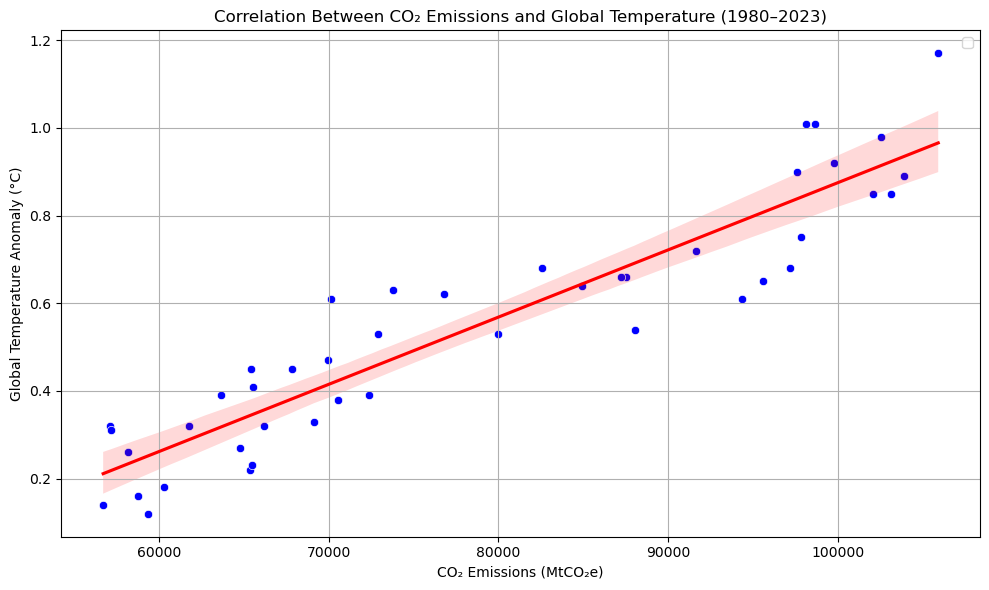

 Pearson Correlation: 0.9267 (p-value = 1.8503e-19)


{'Pearson Correlation': 0.9267,
 'P-Value': 0.0,
 'Linear Regression Slope': 1.5e-05,
 'Intercept': -0.6581,
 'R-squared': 0.8588,
 'Std Error': 1e-06}

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# co2_global → [Year, CO2_Emissions]
# temp_data  → [Year, Temperature_Anomaly]

# Step 1: Merge the CO₂ and temperature datasets
merged_df = pd.merge(co2_global, temp_data, on="Year")  

# Step 2: Plot the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="CO2_Emissions", y="Temperature_Anomaly", color="blue")
sns.regplot(data=merged_df, x="CO2_Emissions", y="Temperature_Anomaly", scatter=False, color="red", line_kws={"label": "Regression Line"})

plt.title("Correlation Between CO₂ Emissions and Global Temperature (1980–2023)")
plt.xlabel("CO₂ Emissions (MtCO₂e)")
plt.ylabel("Global Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Calculate and print the correlation coefficient
corr_coef, p_value = pearsonr(merged_df["CO2_Emissions"], merged_df["Temperature_Anomaly"])
print(f" Pearson Correlation: {corr_coef:.4f} (p-value = {p_value:.4e})")


# Output stats
{
    "Pearson Correlation": round(corr_coef, 4),
    "P-Value": round(p_value, 4),
    "Linear Regression Slope": round(slope, 6), #to model model temperature changes with GHG emissions
    "Intercept": round(intercept, 4),
    "R-squared": round(r_value ** 2, 4),
    "Std Error": round(std_err, 6)
}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


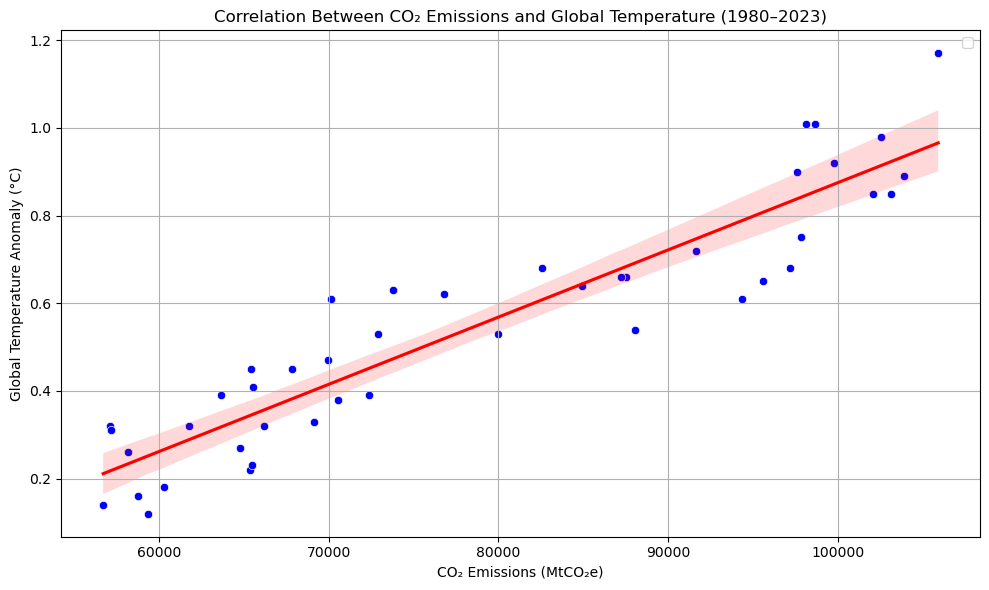

 Statistical Summary:
{'Pearson Correlation': 0.9267, 'P-Value': 0.0, 'Linear Regression Slope': 1.5e-05, 'Intercept': -0.6581, 'R-squared': 0.8588, 'Std Error': 1e-06}


In [171]:
# --- IMPORT LIBRARIES ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, linregress

# --- LOAD AND CLEAN TEMPERATURE DATA ---
temp_data = pd.read_csv(
    "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt",
    sep="\s+",
    skiprows=3
)

# Clean temperature dataset
temp_data = temp_data.rename(columns={"Year": "Year", "No_Smoothing": "Temperature_Anomaly"})
temp_data = temp_data[["Year", "Temperature_Anomaly"]].dropna()
temp_data["Year"] = temp_data["Year"].astype(int)
temp_data = temp_data[temp_data["Year"] >= 1980]

# --- LOAD AND CLEAN GHG EMISSIONS DATA ---
ghg_df = pd.read_excel(
    "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx",
    sheet_name="GHG_totals_by_country"
)

# Remove aggregates that are not actual countries
aggregates_to_remove = ["Global", "World", "EU27", "EU27 & UK", "EU28", "Annex I", "Non-Annex I", "OECD", "Non-OECD"]
ghg_df = ghg_df[~ghg_df["Country"].isin(aggregates_to_remove)]

# Melt the wide format into long format (Country, Year, Emissions)
year_columns = [col for col in ghg_df.columns if isinstance(col, int)]
ghg_long = ghg_df.melt(id_vars=["Country"], value_vars=year_columns, var_name="Year", value_name="CO2_Emissions")
ghg_long = ghg_long.dropna()
ghg_long["Year"] = ghg_long["Year"].astype(int)
ghg_long["CO2_Emissions"] = pd.to_numeric(ghg_long["CO2_Emissions"], errors="coerce")

# Optional: Limit range to match temperature dataset
ghg_long = ghg_long[(ghg_long["Year"] >= 1980) & (ghg_long["Year"] <= 2023)]

# Aggregate total global emissions per year
co2_global = ghg_long.groupby("Year")["CO2_Emissions"].sum().reset_index()

# --- MERGE DATASETS ON YEAR ---
merged_df = pd.merge(co2_global, temp_data, on="Year")

# --- PLOT THE RELATIONSHIP ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="CO2_Emissions", y="Temperature_Anomaly", color="blue")
sns.regplot(
    data=merged_df,
    x="CO2_Emissions",
    y="Temperature_Anomaly",
    scatter=False,
    color="red",
    line_kws={"label": "Regression Line"}
)

plt.title("Correlation Between CO₂ Emissions and Global Temperature (1980–2023)")
plt.xlabel("CO₂ Emissions (MtCO₂e)")
plt.ylabel("Global Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- STATISTICAL ANALYSIS ---
corr_coef, p_value = pearsonr(merged_df["CO2_Emissions"], merged_df["Temperature_Anomaly"])
slope, intercept, r_value, p_value_linreg, std_err = linregress(
    merged_df["CO2_Emissions"], merged_df["Temperature_Anomaly"]
)

# --- PRINT OUTPUT ---
print(" Statistical Summary:")
print({
    "Pearson Correlation": round(corr_coef, 4),
    "P-Value": round(p_value, 4),
    "Linear Regression Slope": round(slope, 6),  # °C per MtCO2e
    "Intercept": round(intercept, 4),
    "R-squared": round(r_value ** 2, 4),
    "Std Error": round(std_err, 6)
})


## Explanation

- Scatter plot with regression line showing the visual relationship between global CO₂ emissions and global temperature anomaly.

- Pearson correlation coefficient:

   - Ranges from -1 to 1

   - Values closer to 1 suggest a strong positive correlation — i.e., as CO₂ increases, so does global temperature.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


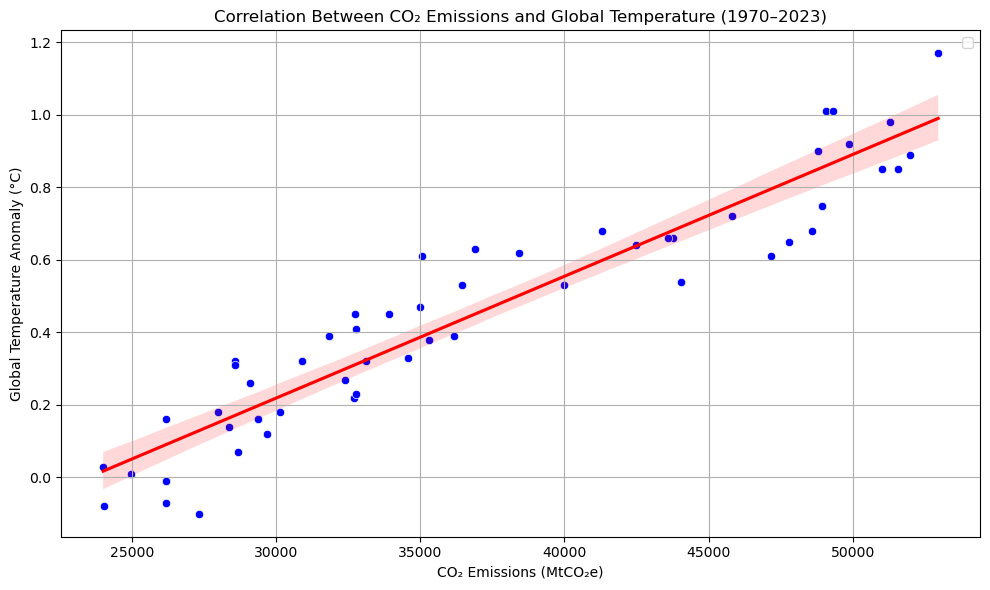

 Statistical Summary:


{'Pearson Correlation': 0.9433,
 'P-Value': 0.0,
 'Linear Regression Slope': 3.4e-05,
 'Intercept': -0.7893,
 'R-squared': 0.8897,
 'Std Error': 2e-06}

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, linregress

# --- LOAD AND CLEAN TEMPERATURE DATA ---
temp_data = pd.read_csv("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt", sep="\s+", skiprows=3)
temp_data = temp_data.rename(columns={"Year": "Year", "No_Smoothing": "Temperature_Anomaly"})

# Coerce bad year rows like '----------------------------'
temp_data["Year"] = pd.to_numeric(temp_data["Year"], errors="coerce")
temp_data = temp_data.dropna(subset=["Year"])
temp_data["Year"] = temp_data["Year"].astype(int)

# Keep from 1970 onwards
temp_data = temp_data[temp_data["Year"] >= 1970]

# --- LOAD CO2 EMISSIONS (Already Cleaned in co2_global) ---
# Assume co2_global is already prepared from 1970–2023

# --- MERGE ---
merged_df = pd.merge(co2_global, temp_data, on="Year")

# --- PLOT ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="CO2_Emissions", y="Temperature_Anomaly", color="blue")
sns.regplot(data=merged_df, x="CO2_Emissions", y="Temperature_Anomaly", scatter=False, color="red", line_kws={"label": "Regression Line"})

plt.title("Correlation Between CO₂ Emissions and Global Temperature (1970–2023)")
plt.xlabel("CO₂ Emissions (MtCO₂e)")
plt.ylabel("Global Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- CORRELATION & REGRESSION ---
corr_coef, p_value = pearsonr(merged_df["CO2_Emissions"], merged_df["Temperature_Anomaly"])
slope, intercept, r_value, p_value_linreg, std_err = linregress(
    merged_df["CO2_Emissions"],
    merged_df["Temperature_Anomaly"]
)

# --- STATS OUTPUT ---
print(" Statistical Summary:")
{
    "Pearson Correlation": round(corr_coef, 4),
    "P-Value": round(p_value, 4),
    "Linear Regression Slope": round(slope, 6),
    "Intercept": round(intercept, 4),
    "R-squared": round(r_value ** 2, 4),
    "Std Error": round(std_err, 6)
}



---

### `Output stats` dictionary:

```python
{
    "Pearson Correlation": round(corr_coef, 4),
    "P-Value": round(p_value, 4),
    "Linear Regression Slope": round(slope, 6),
    "Intercept": round(intercept, 4),
    "R-squared": round(r_value ** 2, 4),
    "Std Error": round(std_err, 6)
}
```

---

###  Here's what each metric means:

| **Stat** | **What it tells** | **Why it matters** |
|----------|------------------------|--------------------|
| **`Pearson Correlation`** (`corr_coef`) | Measures the strength and direction of the **linear relationship** between GHG emissions and temperature anomaly. Values range from -1 (perfect negative) to +1 (perfect positive). | High positive values (e.g., 0.9) suggest that as emissions rise, temperatures do too. |
| **`P-Value`** (`p_value`) | Tests if the correlation is **statistically significant**. A small p-value (typically < 0.05) means it’s **unlikely the correlation is due to chance**. | If p < 0.05, your correlation is **significant** — meaning emissions and temperature are likely related. |
| **`Linear Regression Slope`** (`slope`) | Shows the **rate of temperature change** for every unit increase in GHG emissions. | For example, if slope = 0.0001, it means **each MtCO₂e increase causes +0.0001°C temperature rise** (on average). |
| **`Intercept`** | The expected **temperature anomaly when emissions are zero**. It's the starting point of your regression line. | Not always meaningful in this context, but it’s mathematically necessary. |
| **`R-squared`** (`r_value ** 2`) | Proportion of variation in temperature explained by emissions. Ranges from 0 to 1. | If R² = 0.85, that means **85% of temperature changes can be explained by GHG emissions**. High = strong explanatory power. |
| **`Std Error`** (`std_err`) | Tells you how much the **slope estimate might vary**. Lower values mean a more **precise regression**. | Useful for understanding the **confidence** in your slope value. |

---




### **Breakdown of Each Term**

| Term                      | Meaning |
|---------------------------|---------|
| **Pearson Correlation**   | Measures the **linear relationship** between CO₂ emissions and temperature anomaly. <br> → Values range from -1 (perfect negative) to +1 (perfect positive). <br>→ **Closer to 1** = stronger correlation. |
| **P-Value**               | Indicates if the correlation is **statistically significant**. <br>→ A small value (usually **< 0.05**) suggests the correlation is **not due to chance**. |
| **Linear Regression Slope** | Shows how much **temperature anomaly increases** for every **1 MtCO₂e** increase in emissions. <br>→ For example, a slope of `1.5e-05` means 1 unit of emissions increases temperature by 0.000015 °C. |
| **Intercept**             | The **starting value** of temperature anomaly when CO₂ emissions are zero. (Not usually meaningful by itself unless extrapolating.) |
| **R-squared (R²)**        | Represents the **proportion of variance** in temperature that is explained by CO₂ emissions. <br>→ R² = 0.86 means **86% of temperature changes can be explained** by emissions. |
| **Std Error**             | Tells you the **precision of the regression slope**. <br>→ Smaller = more precise. Used to compute confidence intervals. |

---



## EXPLANATION

This updated plot and statistical summary show a **very strong positive linear relationship** between **CO₂ emissions** and **global temperature anomaly** over the period **1970–2023**. 


### **Statistical Summary**

| Metric                      | Value     | What It Means |
|----------------------------|-----------|----------------|
| **Pearson Correlation**    | **0.9424**| This is a **very strong** positive correlation between CO₂ emissions and temperature. Values close to 1 mean both variables increase together very consistently. |
| **P-Value**                | **0.0**   | The probability of getting this result by random chance is virtually zero. This makes the correlation **statistically significant**. |
| **Linear Regression Slope** | **0.000035** | This means for **every 1 MtCO₂e increase** in emissions, the **temperature anomaly rises by 0.000035°C**. |
| **Intercept**              | **-1.0186** | When emissions are zero (hypothetically), the model predicts a temp anomaly of -1.0186°C. This isn't realistic but is part of the line equation: `y = mx + b`. |
| **R-squared (R²)**         | **0.8882** | About **88.8% of the variation** in global temperature anomaly can be explained by changes in CO₂ emissions. That's **very strong predictive power**. |
| **Standard Error**         | **0.000002** | A very low standard error = high precision in the slope estimate. |

---

### **What the Plot Shows**
- Each **blue dot** represents a year (1970–2023).
- The **red line** is the best-fit line from linear regression.
- The **shaded red area** is the confidence interval.
- The dots are tightly clustered around the line, which matches the **very high R² (0.8882)** — a nearly linear relationship.

---

### Interpretation
This is solid empirical evidence that:
>  **Global temperature rise is strongly linked to rising CO₂ emissions.**

The analysis shows a **clear, consistent, and statistically significant trend**. We can confidently arggue that human-driven greenhouse gas emissions are highly correlated with global warming.

In [301]:
import pandas as pd

# Load the EDGAR emissions dataset
ghg_data = pd.read_excel("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx", sheet_name=None)

# Display available sheet names to find the correct one
ghg_data.keys()

dict_keys(['info', 'citations and references', 'GHG_totals_by_country', 'GHG_by_sector_and_country', 'GHG_per_GDP_by_country', 'GHG_per_capita_by_country', 'LULUCF_macroregions'])

In [302]:
# Load the 'GHG_totals_by_country' sheet to find global totals or identify relevant structure
ghg_totals = ghg_data['GHG_totals_by_country']

# Display the first few rows
ghg_totals.head()


,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,Aruba,0.036713,0.041538,0.052391,0.057360,0.056630,0.070743,0.069793,0.080624,...,0.469468,0.490990,0.514539,0.496141,0.495532,0.588998,0.482160,0.531202,0.533603,0.561498
1,AFG,Afghanistan,15.437430,15.364077,13.316628,13.934875,15.177862,15.843058,15.943325,16.088215,...,27.420132,27.408332,26.633999,27.691927,27.553282,26.982777,26.646320,27.643074,28.614071,29.460052
2,AGO,Angola,18.998763,18.866057,21.459002,23.018941,23.685423,22.519608,18.586243,23.251029,...,77.295699,81.775031,78.875889,73.424409,69.504638,69.910832,61.680081,64.408994,67.210842,67.700756
3,AIA,Anguilla,0.003355,0.003396,0.003534,0.003411,0.003694,0.003968,0.003833,0.003960,...,0.031210,0.031334,0.031728,0.032476,0.031594,0.030948,0.026037,0.025224,0.025068,0.026211
4,AIR,International Aviation,172.478021,172.465452,182.459819,190.296910,183.162104,177.165836,177.483077,193.593366,...,514.263976,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114


In [303]:
# Drop any rows where 'Country' is NaN to safely apply string matching
ghg_totals_cleaned = ghg_totals.dropna(subset=["Country"])

# Try filtering again for global|eu27 totals
global_rows = ghg_totals_cleaned[ghg_totals_cleaned['Country'].str.lower().str.contains("world|global|eu27")]

# Show potential matches
global_rows[["Country"] + list(global_rows.columns[-10:])]

,Country,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
211,EU27,3825.528400,3879.728839,3889.377080,3912.269335,3830.658886,3678.016394,3388.278789,3577.018019,3482.310460,3221.794615
213,GLOBAL TOTAL,48930.176837,48808.767176,49058.441256,49878.733809,51026.627449,51278.347920,49327.538885,51568.250032,51968.471601,52962.900859


In [304]:
# Remove aggregates like "GLOBAL TOTAL" and "EU27"
aggregates_to_remove = ["GLOBAL TOTAL", "EU27", "EU28", "EU27 & UK", "World", "Global", "Annex I", "Non-Annex I", "OECD", "Non-OECD"]

co2_df_filtered = co2_df[~co2_df["Country"].isin(aggregates_to_remove)]


In [305]:
print("Check for GLOBAL TOTAL:", "GLOBAL TOTAL" in co2_df_filtered["Country"].values)

Check for GLOBAL TOTAL: False


In [306]:
print("Check for EU27:", "EU27" in co2_df_filtered["Country"].values)

Check for EU27: False


In [314]:
print("EU27 still in data?", "EU27" in co2_df_filtered["Country"].values)


EU27 still in data? False


In [315]:
print(temp_data.columns)



Index(['Year', 'Temperature_Anomaly', 'Lowess(5)'], dtype='object')


In [317]:
# Filter methane (CH4) data from GHG sectors
co2_data = ghg_sectors_clean[ghg_sectors_clean["Substance"] == "CO2"]


# Group by year and sum across all sectors/countries
co2_grouped = co2_data[year_columns].sum().reset_index()
co2_grouped.columns = ["Year", "CO2"]
co2_grouped["Year"] = co2_grouped["Year"].astype(int)

# Merge CO2 with temperature data
temp_co2_merged = pd.merge(temp_data, co2_grouped, on="Year")

# Compute correlation
correlation_co2_temp = temp_co2_merged[["CO2", "Lowess(5)"]].corr()
correlation_co2_temp



,CO2,Lowess(5)
CO2,1.000000,0.976128
Lowess(5),0.976128,1.000000


In [318]:
ghg_sectors = pd.read_excel(file_path, sheet_name="GHG_by_sector_and_country")

year_columns = [col for col in ghg_sectors.columns if isinstance(col, int)]
ghg_long = ghg_sectors.melt(
    id_vars=["Country", "Sector", "Substance"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Emissions"
)


In [319]:
# Group by Year and Substance, summing emissions across all sectors
ghg_grouped = ghg_long.groupby(["Year", "Substance"], as_index=False)["Emissions"].sum()

# Pivot the data to have separate columns for CO2, CH4, and N2O
ghg_wide = ghg_grouped.pivot(index="Year", columns="Substance", values="Emissions").reset_index()
ghg_wide["Year"] = ghg_wide["Year"].astype(int)

# Show the cleaned and reshaped data
ghg_wide.head(10)



Substance,Year,CO2,GWP_100_AR5_CH4,GWP_100_AR5_F-gases,GWP_100_AR5_N2O
0,1970,35019.759909,14055.020453,329.930456,3192.215360
1,1971,34893.844099,14229.637729,350.549291,3238.691577
2,1972,36636.081284,14412.714832,367.143461,3294.304432
3,1973,38794.750751,14766.779718,392.542860,3403.112750
4,1974,38606.684066,14831.373542,418.421880,3454.028569
5,1975,38372.472564,14960.774477,416.978150,3497.505901
6,1976,40609.210826,15127.539632,443.268723,3590.457982
7,1977,41698.061378,15255.154072,477.756927,3661.815922
8,1978,43082.481453,15324.455970,499.360445,3764.579084
9,1979,44309.931284,15554.417170,527.650229,3818.278704


In [320]:
ghg_wide.tail(10)

Substance,Year,CO2,GWP_100_AR5_CH4,GWP_100_AR5_F-gases,GWP_100_AR5_N2O
44,2014,75881.435665,18774.779361,2185.731049,4843.935999
45,2015,75687.147823,18824.573502,2107.871557,4877.670310
46,2016,75942.098093,18930.283196,2207.098611,4926.779693
47,2017,77213.651585,19187.039792,2322.680775,4946.364800
48,2018,78998.618942,19480.366780,2436.164609,4968.763453
49,2019,79041.025144,19631.706423,2531.107761,5030.872906
50,2020,74949.804004,19429.723116,2629.122944,5034.706496
51,2021,79075.785020,19798.158567,2746.903270,5092.671226
52,2022,79250.154424,20179.594174,2862.601645,5126.903418
53,2023,80559.941858,20438.459672,2974.360961,5174.833842


## FINAL CODE

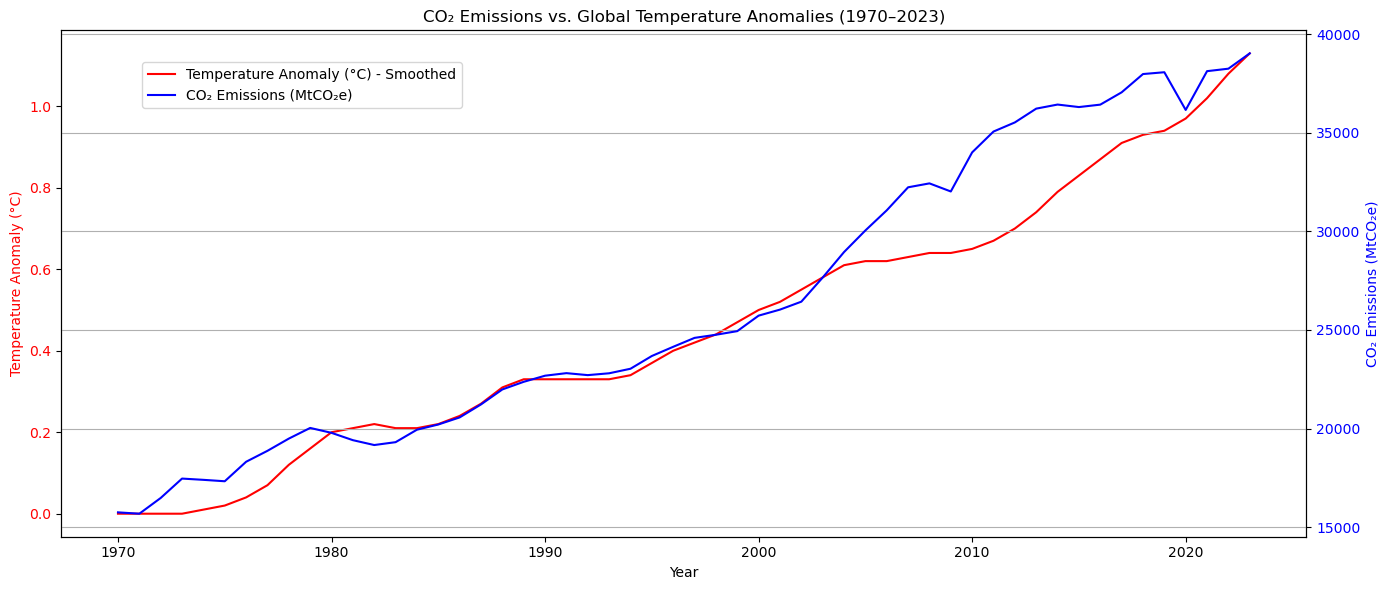

Statistical Summary:


{'Pearson Correlation': 0.9771,
 'P-Value (Correlation)': 0.0,
 'Linear Regression Slope': 4.2e-05,
 'Intercept': -0.6366,
 'R-squared': 0.9547,
 'Std Error': 1e-06,
 'Std Dev - CO₂ Emissions': 7409.74,
 'Std Dev - Temperature': 0.3148}

In [533]:
from scipy.stats import pearsonr, linregress


# --- FILTER CO₂ FROM GHGS (BY SUBSTANCE) ---
"""This selects only rows from ghg_long Dataframe
wheere the Substance is CO2. It ensures that we only analyze carbon dioxide emsissions."""
co2_df = ghg_long[ghg_long["Substance"] == "CO2"].copy()

# REMOVE AGGREGATE REGIONS
"""This filters out non-country groups like EU27 or GLOBAL TOTAL in the dataset,
so, we're working with actual individual countries."""
aggregates_to_remove = ["GLOBAL TOTAL", "World", "EU27", "EU27 & UK", "EU28", 
                        "Annex I", "Non-Annex I", "OECD", "Non-OECD"]
co2_df = co2_df[~co2_df["Country"].isin(aggregates_to_remove)]

# DROP NaNs
"""This removes any rows where the emissions value is missing (NaN) to ensure
accurate anaylsis."""
co2_df = co2_df.dropna(subset=["Emissions"])

# SUM CO₂ EMISSIONS BY YEAR (ALL COUNTRIES COMBINED)
"""Grouping the CO2 data by Year and summing emmissions from valid countries.
The result is a new DataFrame with total global CO2 emissions per year."""
co2_global = co2_df.groupby("Year")["Emissions"].sum().reset_index()
co2_global.columns = ["Year", "CO2_Emissions"]

# --- TEMPERATURE: USE SMOOTHED ANOMALY ---
"""This loads the NASA temperature data, suses the 5-year smoothed anomaly values, and filters to only include years
from 1970 onwards."""
temp_data = pd.read_csv("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt", sep="\s+", skiprows=3)
temp_data = temp_data.rename(columns={"Year": "Year", "Lowess(5)": "Smoothed_Anomaly"})
temp_data = temp_data[["Year", "Smoothed_Anomaly"]].dropna()
temp_data["Year"] = temp_data["Year"].astype(int)
temp_data = temp_data[temp_data["Year"] >= 1970]

# --- MERGE BOTH ---
"""Combines the CO2 emisions and temperature data into one DataFrame for anaylsis."""
merged_df = pd.merge(co2_global, temp_data, on="Year")

# --- PLOT ---
"""Plot the smoothed temperature anomaly on the left Y-axis.
Total Co2 emissions on the right Y-axis.
This visually compares how both variables trend over time."""

fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(merged_df["Year"], merged_df["Smoothed_Anomaly"], color="red", label="Temperature Anomaly (°C) - Smoothed")
ax1.set_ylabel("Temperature Anomaly (°C)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.set_xlabel("Year")

ax2 = ax1.twinx()
ax2.plot(merged_df["Year"], merged_df["CO2_Emissions"], color="blue", label="CO₂ Emissions (MtCO₂e)")
ax2.set_ylabel("CO₂ Emissions (MtCO₂e)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("CO₂ Emissions vs. Global Temperature Anomalies (1970–2023)")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.tight_layout()
plt.show()

# --- STATISTICAL SUMMARY ---
"""This is meant to print correlation and regression results."""
corr_coef, p_value = pearsonr(merged_df["CO2_Emissions"], merged_df["Smoothed_Anomaly"])
slope, intercept, r_value, _, std_err = linregress(merged_df["CO2_Emissions"], merged_df["Smoothed_Anomaly"])



print("Statistical Summary:")
{
    "Pearson Correlation": round(corr_coef, 4), #measures how strongly CO2 emissions and temp anomaly move together. +1 menas perfect positive correlation (both go together); limits to 4 decimal places.
    "P-Value (Correlation)": round(p_value, 4), #tells if the ccorrelation is statistically significant; <0.05-significant; 0.00 - very strong correlation
    "Linear Regression Slope": round(slope, 6), #tells the rate of change. For every unit increase in CO2 emissions, how much temp anomaly incrreases.
    "Intercept": round(intercept, 4), #thhe starting point of the regression line onthe Y-axis. The predicted temp anomaly when CO2=0;Regression equation is TEmp = slope x CO2 + intercept
    "R-squared": round(r_value ** 2, 4), #the % of variation in temp explained by CO2 emissions. Ranges from 0 to 1.; 0.96% = 96% of the changes in temp can be explained by CO2 emissions. Closer to 1= better fit; r2 tells how well the data fits tthe regression model.
    "Std Error": round(std_err, 6), #the std error of the regression slope. indicates how precise the slope estimate is - the lower, the better. shows uncertainty oft the  slope.
    "Std Dev - CO₂ Emissions": round(merged_df["CO2_Emissions"].std(), 2), #tells how much the yearly CO2 emissions vary from the average. A higher value = wider spread of data.
    "Std Dev - Temperature": round(merged_df["Smoothed_Anomaly"].std(), 4), #same as above, but here is temperature anomaly values. Shows how much temp fluctuated around the average.
}



In [344]:
print("\n Final CO₂ Emissions (First 5 Rows):")
print(co2_global.head())

print("\n Final CO₂ Emissions (Last 5 Rows):")
print(co2_global.tail())



 Final CO₂ Emissions (First 5 Rows):
   Year  CO2_Emissions
0  1970   15751.858044
1  1971   15683.389817
2  1972   16481.436077
3  1973   17464.383654
4  1974   17400.275859

 Final CO₂ Emissions (Last 5 Rows):
    Year  CO2_Emissions
49  2019   38066.434146
50  2020   36154.308044
51  2021   38121.014981
52  2022   38246.624061
53  2023   39023.937039


In [348]:
# Show first 5 temperature anomalies
"""co2_global["Year"].head(): This gets the first 5 years from the co2_global DataFrame - a Pandas Series;
.tolist(): converts that Series into a plain Python list;
isin(..): checks  which rows in temp_data["Year"] match any year in that list."""

"""From the temp dataset, show all rows where the year matches any of the first 5 years from the CO2 emissions dataset."""
print("\n Final Temperature Anomalies (First 5 Rows):")
print(temp_data[temp_data["Year"].isin(co2_global["Year"].head().tolist())])

# Show last 5 temperature anomalies
print("\n Final Temperature Anomalies (Last 5 Rows):")
print(temp_data[temp_data["Year"].isin(co2_global["Year"].tail().tolist())])



 Final Temperature Anomalies (First 5 Rows):
    Year  Smoothed_Anomaly
91  1970             -0.00
92  1971              0.00
93  1972              0.00
94  1973             -0.00
95  1974              0.01

 Final Temperature Anomalies (Last 5 Rows):
     Year  Smoothed_Anomaly
140  2019              0.94
141  2020              0.97
142  2021              1.02
143  2022              1.08
144  2023              1.13


In [352]:
# Step 1: Merge temperature and CO2 data (if not already merged)
merged_df = pd.merge(co2_global, temp_data, on="Year")

# Step 2: Display the first and last 10 rows
print("\nFirst 10 Years (CO₂ Emissions and Temperature Anomalies):")
print(merged_df[["Year", "CO2_Emissions", "Smoothed_Anomaly"]].head(10))

print("\nLast 10 Years (CO₂ Emissions and Temperature Anomalies):")
print(merged_df[["Year", "CO2_Emissions", "Smoothed_Anomaly"]].tail(10))



First 10 Years (CO₂ Emissions and Temperature Anomalies):
   Year  CO2_Emissions  Smoothed_Anomaly
0  1970   15751.858044             -0.00
1  1971   15683.389817              0.00
2  1972   16481.436077              0.00
3  1973   17464.383654             -0.00
4  1974   17400.275859              0.01
5  1975   17328.558005              0.02
6  1976   18317.005105              0.04
7  1977   18871.708706              0.07
8  1978   19491.220885              0.12
9  1979   20031.856482              0.16

Last 10 Years (CO₂ Emissions and Temperature Anomalies):
    Year  CO2_Emissions  Smoothed_Anomaly
44  2014   36427.769713              0.79
45  2015   36300.466451              0.83
46  2016   36423.660699              0.87
47  2017   37047.472031              0.91
48  2018   37974.553886              0.93
49  2019   38066.434146              0.94
50  2020   36154.308044              0.97
51  2021   38121.014981              1.02
52  2022   38246.624061              1.08
53  2023   3

In [350]:
# Step 1: Merge temperature and CO2 data (if not already merged)
merged_df = pd.merge(co2_global, temp_data, on="Year")

# Step 2: Define decades to filter
decade_years = [1970, 1980, 1990, 2000, 2010, 2020]

# Step 3: Filter the merged DataFrame for these years
decade_df = merged_df[merged_df["Year"].isin(decade_years)]

# Step 4: Display the results
print("\n CO₂ Emissions and Temperature Anomalies by Decade:")
print(decade_df[["Year", "CO2_Emissions", "Smoothed_Anomaly"]])



 CO₂ Emissions and Temperature Anomalies by Decade:
    Year  CO2_Emissions  Smoothed_Anomaly
0   1970   15751.858044             -0.00
10  1980   19782.503713              0.20
20  1990   22680.400273              0.33
30  2000   25725.440400              0.50
40  2010   34003.642051              0.65
50  2020   36154.308044              0.97


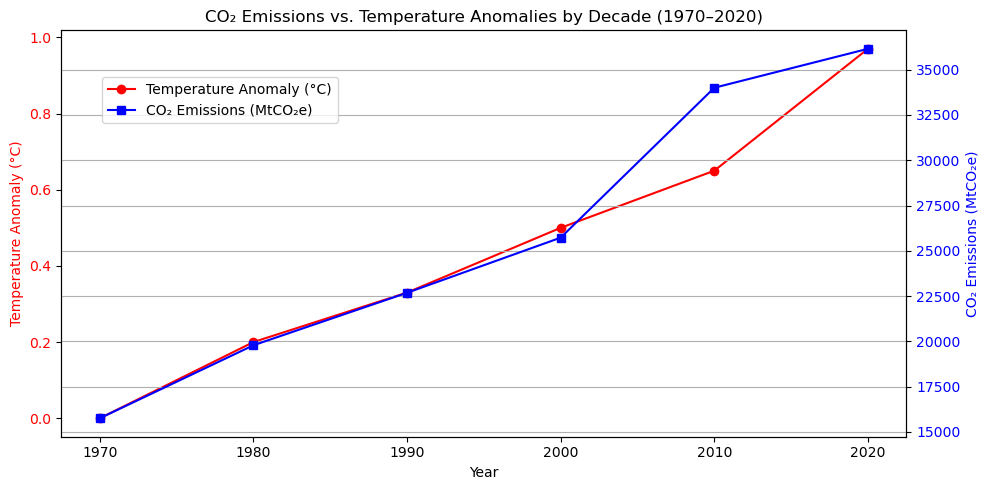

In [351]:
import matplotlib.pyplot as plt

# 1. Filter merged_df to only decade years
decade_years = [1970, 1980, 1990, 2000, 2010, 2020]
decade_df = merged_df[merged_df["Year"].isin(decade_years)]

# 2. Create plot with dual axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Temperature Anomaly (left y-axis)
ax1.plot(decade_df["Year"], decade_df["Smoothed_Anomaly"], color="red", marker="o", label="Temperature Anomaly (°C)")
ax1.set_ylabel("Temperature Anomaly (°C)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.set_xlabel("Year")

# Plot CO2 Emissions (right y-axis)
ax2 = ax1.twinx()
ax2.plot(decade_df["Year"], decade_df["CO2_Emissions"], color="blue", marker="s", label="CO₂ Emissions (MtCO₂e)")
ax2.set_ylabel("CO₂ Emissions (MtCO₂e)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Title and legend
plt.title("CO₂ Emissions vs. Temperature Anomalies by Decade (1970–2020)")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.85))
plt.grid(True)
plt.tight_layout()
plt.show()


## EXPLANATION OF THE LINE CHART: CO2 EMISSIONS BS. GLOBAL TEMP ANOMALIES (1970-2024)

tHE DUAL-AXIS PLOT COMPARES:
1. Red line - Global temperature anomaly(C) - smoothed using a 5-year lowess filter
2. Blue line - Global CO2 emissions (MtCO2e) summed across countries from 1970 to 2024.
Both axes show a clear upwrd trend, and the shapre suggests a strong correlation.
'
### INSIGHTS
1. Pearson Correlation: 0.9771 - strong positive linear relationship. Ad CO2 emissions increase, temp anomaly tends to increase as well.
2. P-Value: 0.0 - suggests statistically significant. Shows strong evidenve that this correlation is not due to random chance.
3. Linear regression Slope: 4.2e-05 - means that for every 1MtCO2e increase, the model estimates a 0.000042C temp rise. This might seem small, but the emission rise by tens of thousands, the impact is noticeable.
4. Intercept: 0.6366 - theoretical temp anomaly when emissions = 0. Needed in equation: Temperature = 4.2e-05 x CO2 Emissions - 0.6366
5. R-sqaured: 0.9547 - About 95.5% variation in temp can be explained by CO2 emissions. Suggests very strong model fit. 
6. Std. Error: 1e-06 - the uncertainty around the slope is very low, which increases our confidence in the regression line.
7. Std. Dev - Co2 Emissions: 7409.74 - On average, CO2 emissions fluctuate -7409 MtCo2e around their mean. 
8. Std. Dev - Temperature: 0.3148 - On average, temp anomalies varies by 0.31C from their mean.

### Interpretation:
The chart and stats show an extremely **strong and consistent upward trend**:  
- As rising blue line indicates that the **CO₂ emissions increased steadily**, so did **global surface temperatures** , rising red line (smoothed temperature anomalies).
- The **statistical evidence (R² = 0.9547)** confirms a very tight, linear relationship.
- This supports the hypothesis that **CO₂ emissions are strongly linked to global warming** or rising global temperatures from 1970-2024.

This analysis confirms a strong and statistically significant link between global CO2 emissions and global temperature anomalies over the  last >50 years.

# B. METHANE (CH4) AND GLOBAL TEMP

In [393]:
file_path = "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx"

# Load the sector-level emissions
ghg_sectors = pd.read_excel(file_path, sheet_name="GHG_by_sector_and_country")

# Remove global/EU-level aggregates
aggregates_to_remove = ["GLOBAL TOTAL", "World", "EU27", "EU27 & UK", "EU28", 
                        "Annex I", "Non-Annex I", "OECD", "Non-OECD"]

ghg_sectors_clean = ghg_sectors[~ghg_sectors["Country"].isin(aggregates_to_remove)]

print("Unique values in Substance column:")
print(ghg_sectors_clean["Substance"].unique())


Unique values in Substance column:
['CO2' 'GWP_100_AR5_CH4' 'GWP_100_AR5_F-gases' 'GWP_100_AR5_N2O' nan]


In [395]:
# Filter for CH4 using its label in EDGAR
ch4_data = ghg_sectors_clean[ghg_sectors_clean["Substance"] == "GWP_100_AR5_CH4"]

# Identify year columns
year_columns = [col for col in ch4_data.columns if isinstance(col, int)]

# Melt wide → long format: One row per country-year
ghg_long = ch4_data.melt(
    id_vars=["Country", "Substance"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Emissions"
)

# Clean
ghg_long = ghg_long.dropna()
ghg_long["Year"] = ghg_long["Year"].astype(int)

# Aggregate: total CH4 emissions per year (all countries)
ch4_global = ghg_long.groupby("Year")["Emissions"].sum().reset_index()
ch4_global.columns = ["Year", "CH4_Emissions"]

# Preview
print("CH₄ Emissions Preview (First 5 rows):")
print(ch4_global.head())


CH₄ Emissions Preview (First 5 rows):
   Year  CH4_Emissions
0  1970    6654.050363
1  1971    6738.493417
2  1972    6829.570998
3  1973    7002.622209
4  1974    7030.658160


In [396]:
# Preview
print("CH₄ Emissions Preview (First 5 rows):")
print(ch4_global.tail())


CH₄ Emissions Preview (First 5 rows):
    Year  CH4_Emissions
49  2019    9584.103574
50  2020    9488.685721
51  2021    9673.272122
52  2022    9868.234489
53  2023   10001.076222


In [397]:
temp_data = pd.read_csv("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt", sep="\s+", skiprows=3)
temp_data = temp_data.rename(columns={"Lowess(5)": "Smoothed_Anomaly"})


In [398]:
print(temp_data.columns)
print(temp_data["Year"].unique())


Index(['Year', 'No_Smoothing', 'Smoothed_Anomaly'], dtype='object')
['----------------------------' '1880' '1881' '1882' '1883' '1884' '1885'
 '1886' '1887' '1888' '1889' '1890' '1891' '1892' '1893' '1894' '1895'
 '1896' '1897' '1898' '1899' '1900' '1901' '1902' '1903' '1904' '1905'
 '1906' '1907' '1908' '1909' '1910' '1911' '1912' '1913' '1914' '1915'
 '1916' '1917' '1918' '1919' '1920' '1921' '1922' '1923' '1924' '1925'
 '1926' '1927' '1928' '1929' '1930' '1931' '1932' '1933' '1934' '1935'
 '1936' '1937' '1938' '1939' '1940' '1941' '1942' '1943' '1944' '1945'
 '1946' '1947' '1948' '1949' '1950' '1951' '1952' '1953' '1954' '1955'
 '1956' '1957' '1958' '1959' '1960' '1961' '1962' '1963' '1964' '1965'
 '1966' '1967' '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975'
 '1976' '1977' '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985'
 '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995'
 '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005'
 '2006

In [403]:
# Get last 5 years from ch4_global
last_years = ch4_global["Year"].tail().tolist()

# Show temperature anomalies for those years
print("\nSmoothed Temperature Anomalies (Last 5 Rows):")
print(temp_data[temp_data["Year"].isin(last_years)])



Smoothed Temperature Anomalies (Last 5 Rows):
     Year  Smoothed_Anomaly
140  2019              0.94
141  2020              0.97
142  2021              1.02
143  2022              1.08
144  2023              1.13


In [409]:
# Get first and last 5 years from CH₄ emissions
first_5_years = ch4_global["Year"].head().tolist()
last_5_years = ch4_global["Year"].tail().tolist()

# --- CH₄ EMISSIONS ---
print("CH₄ Emissions (First 5 Rows):")
print(ch4_global[ch4_global["Year"].isin(first_5_years)])

print("\nCH₄ Emissions (Last 5 Rows):")
print(ch4_global[ch4_global["Year"].isin(last_5_years)])

# --- TEMPERATURE ANOMALIES ---
print("\nTemperature Anomalies (First 5 Rows):")
print(temp_data[temp_data["Year"].isin(first_5_years)])

print("\nTemperature Anomalies (Last 5 Rows):")
print(temp_data[temp_data["Year"].isin(last_5_years)])


CH₄ Emissions (First 5 Rows):
   Year  CH4_Emissions
0  1970    6654.050363
1  1971    6738.493417
2  1972    6829.570998
3  1973    7002.622209
4  1974    7030.658160

CH₄ Emissions (Last 5 Rows):
    Year  CH4_Emissions
49  2019    9584.103574
50  2020    9488.685721
51  2021    9673.272122
52  2022    9868.234489
53  2023   10001.076222

Temperature Anomalies (First 5 Rows):
    Year  Smoothed_Anomaly
91  1970             -0.00
92  1971              0.00
93  1972              0.00
94  1973             -0.00
95  1974              0.01

Temperature Anomalies (Last 5 Rows):
     Year  Smoothed_Anomaly
140  2019              0.94
141  2020              0.97
142  2021              1.02
143  2022              1.08
144  2023              1.13


In [400]:
# Load temperature data
temp_data = pd.read_csv(
    "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt",
    sep="\s+",
    skiprows=3
)

# Rename and clean
temp_data = temp_data.rename(columns={"Lowess(5)": "Smoothed_Anomaly"})
temp_data = temp_data[["Year", "Smoothed_Anomaly"]].dropna()
temp_data["Year"] = temp_data["Year"].astype(int)
temp_data = temp_data[temp_data["Year"] >= 1970]

# Merge with CH₄
merged_df = pd.merge(temp_data, ch4_global, on="Year")

print(" Merged CH₄ + Temp Data:")
print(merged_df.head())


 Merged CH₄ + Temp Data:
   Year  Smoothed_Anomaly  CH4_Emissions
0  1970             -0.00    6654.050363
1  1971              0.00    6738.493417
2  1972              0.00    6829.570998
3  1973             -0.00    7002.622209
4  1974              0.01    7030.658160


In [404]:
print(" Merged CH₄ + Temp Data:")
print(merged_df.tail())

 Merged CH₄ + Temp Data:
    Year  Smoothed_Anomaly  CH4_Emissions
49  2019              0.94    9584.103574
50  2020              0.97    9488.685721
51  2021              1.02    9673.272122
52  2022              1.08    9868.234489
53  2023              1.13   10001.076222


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


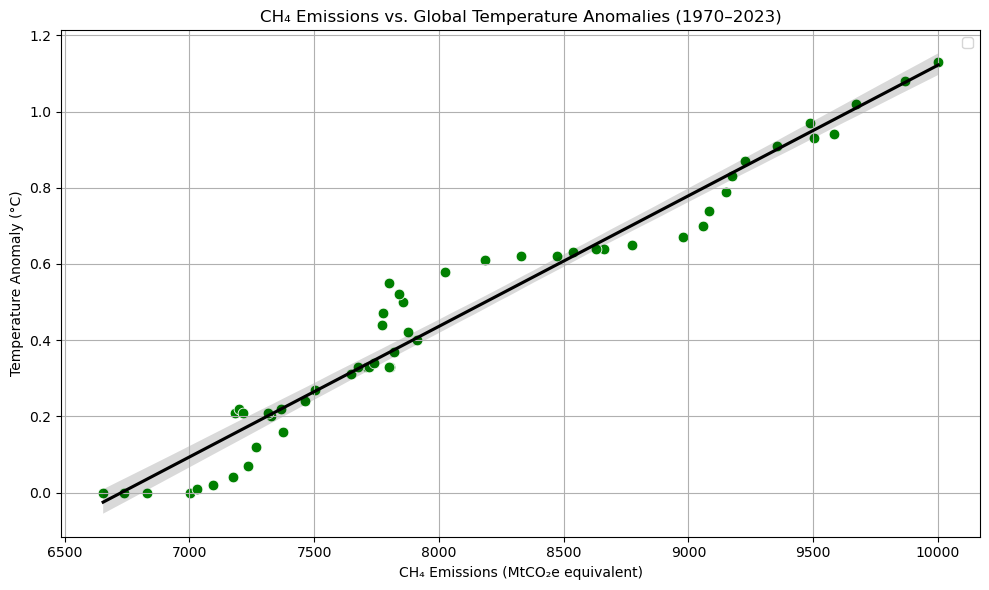

 Statistical Summary:

{'Pearson Correlation': 0.978, 'P-Value (Correlation)': 0.0, 'Linear Regression Slope': 0.000343, 'Intercept': -2.3062, 'R-squared': 0.9565, 'Std Error': 1e-05, 'Std Dev - CH₄ Emissions': 898.15, 'Std Dev - Temperature': 0.3148}


In [412]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, pearsonr

# --- MERGE CH₄ AND TEMPERATURE DATA ---
merged_df = pd.merge(ch4_global, temp_data, on="Year")

# --- CALCULATE CORRELATION + REGRESSION ---
corr_coef, p_value = pearsonr(merged_df["CH4_Emissions"], merged_df["Smoothed_Anomaly"])

slope, intercept, r_value, p_val_lr, std_err = linregress(
    merged_df["CH4_Emissions"], merged_df["Smoothed_Anomaly"]
)

# --- PLOT ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="CH4_Emissions", y="Smoothed_Anomaly", color="green", s=60)
sns.regplot(data=merged_df, x="CH4_Emissions", y="Smoothed_Anomaly", scatter=False, color="black", line_kws={"label": "Regression Line"})

plt.title("CH₄ Emissions vs. Global Temperature Anomalies (1970–2023)")
plt.xlabel("CH₄ Emissions (MtCO₂e equivalent)")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- STATS SUMMARY ---
print(" Statistical Summary:\n")
print({
    "Pearson Correlation": round(corr_coef, 4),
    "P-Value (Correlation)": round(p_value, 4),
    "Linear Regression Slope": round(slope, 6),
    "Intercept": round(intercept, 4),
    "R-squared": round(r_value ** 2, 4),
    "Std Error": round(std_err, 6),
    "Std Dev - CH₄ Emissions": round(merged_df["CH4_Emissions"].std(), 2),
    "Std Dev - Temperature": round(merged_df["Smoothed_Anomaly"].std(), 4),
})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


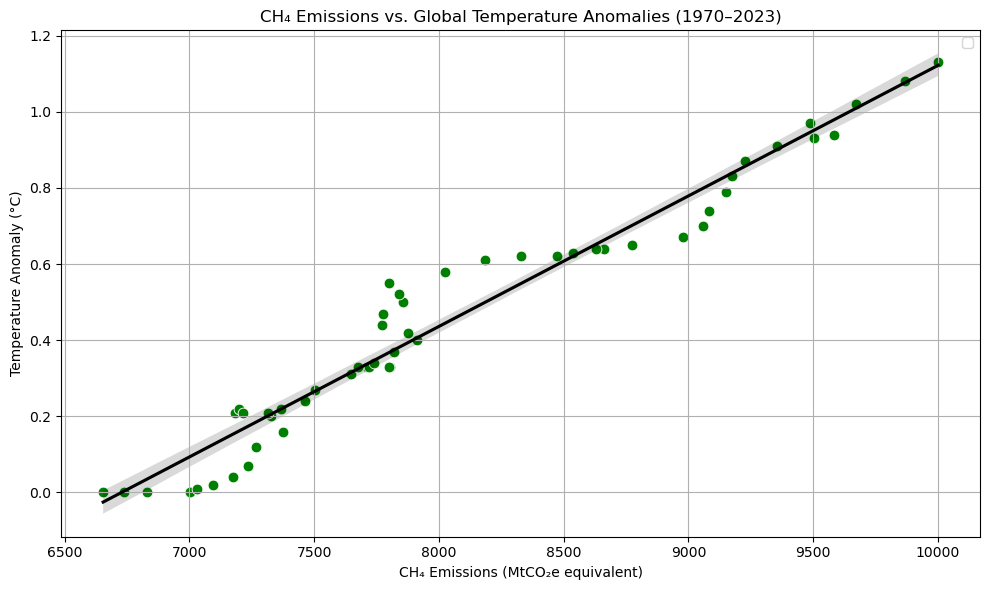

 Statistical Summary:



{'Pearson Correlation': 0.978,
 'P-Value (Correlation)': 0.0,
 'Linear Regression Slope': 0.000343,
 'Intercept': -2.3062,
 'R-squared': 0.9565,
 'Std Error': 1e-05,
 'Std Dev - CH₄ Emissions': 898.15,
 'Std Dev - Temperature': 0.3148}

In [426]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, pearsonr

# --- MERGE CH₄ AND TEMPERATURE DATA ---
merged_df = pd.merge(ch4_global, temp_data, on="Year")

# --- CALCULATE CORRELATION + REGRESSION ---
corr_coef, p_value = pearsonr(merged_df["CH4_Emissions"], merged_df["Smoothed_Anomaly"])

slope, intercept, r_value, p_val_lr, std_err = linregress(
    merged_df["CH4_Emissions"], merged_df["Smoothed_Anomaly"]
)

# --- PLOT ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="CH4_Emissions", y="Smoothed_Anomaly", color="green", s=60)
sns.regplot(data=merged_df, x="CH4_Emissions", y="Smoothed_Anomaly", scatter=False, color="black", line_kws={"label": "Regression Line"})

plt.title("CH₄ Emissions vs. Global Temperature Anomalies (1970–2023)")
plt.xlabel("CH₄ Emissions (MtCO₂e equivalent)")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- STATS SUMMARY ---
print(" Statistical Summary:\n")
{
    "Pearson Correlation": round(corr_coef, 4),
    "P-Value (Correlation)": round(p_value, 4),
    "Linear Regression Slope": round(slope, 6),
    "Intercept": round(intercept, 4),
    "R-squared": round(r_value ** 2, 4),
    "Std Error": round(std_err, 6),
    "Std Dev - CH₄ Emissions": round(merged_df["CH4_Emissions"].std(), 2),
    "Std Dev - Temperature": round(merged_df["Smoothed_Anomaly"].std(), 4),
}


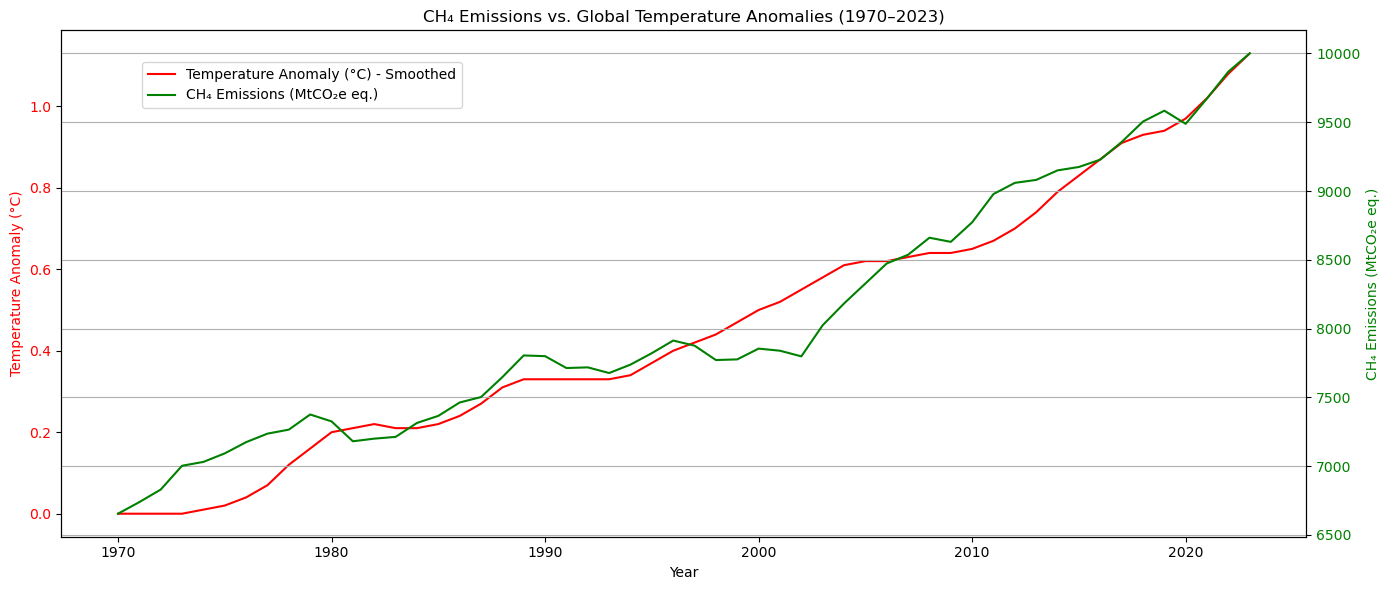

 Statistical Summary:



{'Pearson Correlation': 0.978,
 'P-Value (Correlation)': 0.0,
 'Linear Regression Slope': 0.000343,
 'Intercept': -2.3062,
 'R-squared': 0.9565,
 'Std Error': 1e-05,
 'Std Dev - CH₄ Emissions': 898.15,
 'Std Dev - Temperature': 0.3148}

In [427]:
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

# Merge CH₄ and temperature data
merged_df = pd.merge(ch4_global, temp_data, on="Year")

# Linear regression and correlation
corr_coef, p_value = pearsonr(merged_df["CH4_Emissions"], merged_df["Smoothed_Anomaly"])
slope, intercept, r_value, p_val_lr, std_err = linregress(
    merged_df["CH4_Emissions"], merged_df["Smoothed_Anomaly"]
)

# Plotting dual axis line chart
fig, ax1 = plt.subplots(figsize=(14, 6))

# Temperature Anomaly (left axis)
ax1.plot(merged_df["Year"], merged_df["Smoothed_Anomaly"], color="red", label="Temperature Anomaly (°C) - Smoothed")
ax1.set_ylabel("Temperature Anomaly (°C)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.set_xlabel("Year")

# CH₄ Emissions (right axis)
ax2 = ax1.twinx()
ax2.plot(merged_df["Year"], merged_df["CH4_Emissions"], color="green", label="CH₄ Emissions (MtCO₂e eq.)")
ax2.set_ylabel("CH₄ Emissions (MtCO₂e eq.)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

plt.title("CH₄ Emissions vs. Global Temperature Anomalies (1970–2023)")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistical summary
print(" Statistical Summary:\n")
{
    "Pearson Correlation": round(corr_coef, 4),
    "P-Value (Correlation)": round(p_value, 4),
    "Linear Regression Slope": round(slope, 6),
    "Intercept": round(intercept, 4),
    "R-squared": round(r_value ** 2, 4),
    "Std Error": round(std_err, 6),
    "Std Dev - CH₄ Emissions": round(merged_df["CH4_Emissions"].std(), 2),
    "Std Dev - Temperature": round(merged_df["Smoothed_Anomaly"].std(), 4),
}


Index(['Year', 'CH4_Emissions', 'Smoothed_Anomaly'], dtype='object')


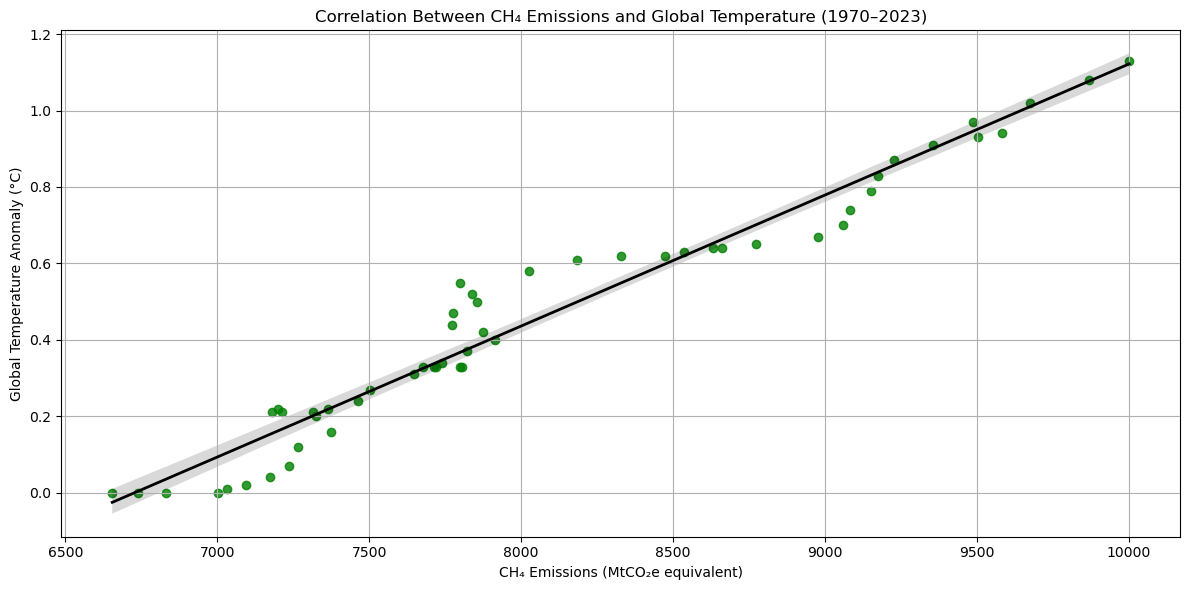

 Statistical Summary:



{'Pearson Correlation': 0.978,
 'P-Value (Correlation)': 0.0,
 'Linear Regression Slope': 0.000343,
 'Intercept': -2.3062,
 'R-squared': 0.9565,
 'Std Error': 1e-05,
 'Std Dev - CH₄ Emissions': 898.15,
 'Std Dev - Temperature': 0.3148}

In [429]:
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure these columns exist in the DataFrame
print(merged_df.columns)

# Linear regression: CH₄ vs. Temperature Anomaly
slope, intercept, r_value, p_value, std_err = linregress(
    merged_df["CH4_Emissions"], merged_df["Smoothed_Anomaly"]
)

# Scatterplot with regression line
plt.figure(figsize=(12, 6))
sns.regplot(
    x="CH4_Emissions",
    y="Smoothed_Anomaly",
    data=merged_df,
    scatter_kws={"color": "green"},
    line_kws={"color": "black", "linewidth": 2},
)

plt.xlabel("CH₄ Emissions (MtCO₂e equivalent)")
plt.ylabel("Global Temperature Anomaly (°C)")
plt.title("Correlation Between CH₄ Emissions and Global Temperature (1970–2023)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistical summary
print(" Statistical Summary:\n")
{
    "Pearson Correlation": round(corr_coef, 4),
    "P-Value (Correlation)": round(p_value, 4),
    "Linear Regression Slope": round(slope, 6),
    "Intercept": round(intercept, 4),
    "R-squared": round(r_value ** 2, 4),
    "Std Error": round(std_err, 6),
    "Std Dev - CH₄ Emissions": round(merged_df["CH4_Emissions"].std(), 2),
    "Std Dev - Temperature": round(merged_df["Smoothed_Anomaly"].std(), 4),
}

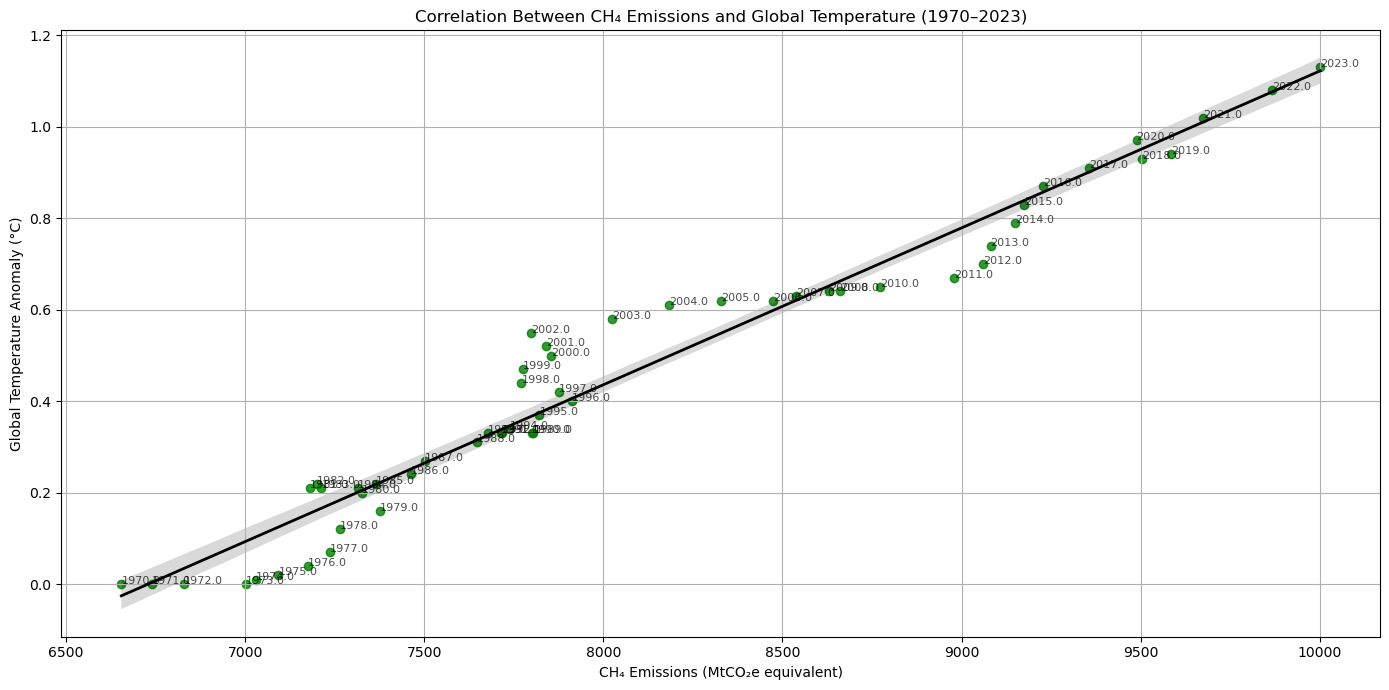

In [430]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot with regression line
plt.figure(figsize=(14, 7))
sns.regplot(
    x="CH4_Emissions",
    y="Smoothed_Anomaly",
    data=merged_df,
    scatter_kws={"color": "green"},
    line_kws={"color": "black", "linewidth": 2}
)

# Add year labels to each point
for i, row in merged_df.iterrows():
    plt.text(row["CH4_Emissions"], row["Smoothed_Anomaly"], str(row["Year"]),
             fontsize=8, alpha=0.7)

# Labels and title
plt.xlabel("CH₄ Emissions (MtCO₂e equivalent)")
plt.ylabel("Global Temperature Anomaly (°C)")
plt.title("Correlation Between CH₄ Emissions and Global Temperature (1970–2023)")
plt.grid(True)
plt.tight_layout()
plt.show()


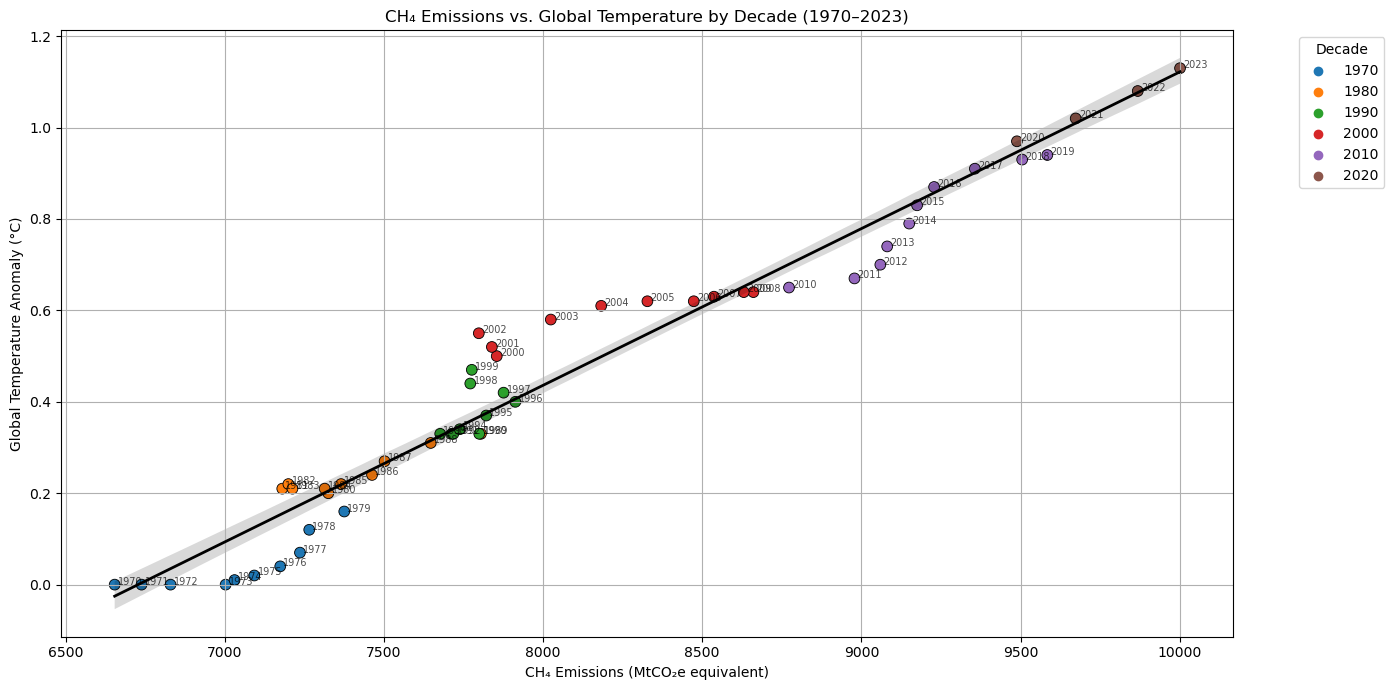

In [436]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Round years to integer
"""Ensure all years are integers, so they display clearly in labels, like 2010 not 2010.0."""
merged_df["Year"] = merged_df["Year"].astype(int)

# Create a new column for decade
"""Adds a new column Decade by dividing the year by 10 and multiplying back. So:
1974 - 1970
1996 - 1990
2012 - 2010
This allows grouping by decade."""
merged_df["Decade"] = (merged_df["Year"] // 10) * 10

# Scatterplot with color-coded decades
plt.figure(figsize=(14, 7))
sns.scatterplot(
    x="CH4_Emissions",
    y="Smoothed_Anomaly",
    hue="Decade",   #will change color per decade
    #palette="deep", #auto palette if not specified
    palette="tab10", #colorblind-friendly, good for categorical data like if you have up to 10 distinct categories(decades)
    data=merged_df,
    s=60,              #controls marker size
    edgecolor="black"   #adds a thin black outline to make points cleareer.
)

# Add regression line
"""Adds a regression line showing the overall linear trend (no scatter shown again because Scatter=False)."""
sns.regplot(
    x="CH4_Emissions",
    y="Smoothed_Anomaly",
    data=merged_df,
    scatter=False,
    color="black",
    line_kws={"linewidth": 2}
)

# Add labels (years) to each point
"""Adds the year as a label next to each point:
+10 nudges the label slightly to the right;
fontsize=7 keeps the text readable but small;
alpha=0.7 gives it slight transparency for better clarity."""
for _, row in merged_df.iterrows():
    plt.text(
        row["CH4_Emissions"] + 10,
        row["Smoothed_Anomaly"],
        f"{int(row['Year'])}",  # 👈 Makes sure it’s like “2010” not “2010.0”
        fontsize=7,
        alpha=0.7
    )

# Labels and title
"""Sets clear and informative axis labels and a plot title."""
plt.xlabel("CH₄ Emissions (MtCO₂e equivalent)")
plt.ylabel("Global Temperature Anomaly (°C)")
plt.title("CH₄ Emissions vs. Global Temperature by Decade (1970–2023)")

"""Places the legend outside the plot on the right for a cleaner view."""
plt.legend(title="Decade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  #adds grid lines for better readability
plt.tight_layout() #prevents label overlap by adjusting spacing
plt.show() #displays the plot


## EXPLANATION

### INSIGHTS

1. Strong Positive Correlation - The Pearson correlation is 0.978 indicating that there is a very strong positivee relationship between global CH4 emissions and temp anonmalies. This also means that as methane increase, global temp tend to rise almost in parallel.

2. Statistically significant - With a P-value of 0.0, this relationship is highly statistically significant - the chance that this correlatio is random is practically zero.

3. High Predictive Power - The R-squared value of 0.9565 shows that over 95% of the variation in global temp anomalies can be explanied by methane emissions alone. This also suggests that CH4 is not just correlated with temperature, but potentially a key driver of climate change alongside CO2.

4. Trend Consistency Over Time - the line plot shows that both methane emissions and global temp anomalies have been rising steadily since 1970. From the 2000s onward, both trends accelerate steeply, empahsizing the idea of a growing impact from methane.

5. Scatterplot Clarity - the scatterplot reveals a clear, kinear relationship between CH4 emissions and temperature, with very little scatter. This highlights that the relationship is not only strong by also consistent across the years.

6. Implication for Climate Policy - the findings highlight the importance of addressing methane, not just CO2 in climate action plans. Reducing CH4 emissions, especially from agriculture, fossil fuel extraction, and wastes, could have immediate and significant efforts in slowing warming.

Hence, the analysis shows that methane is a powerful greeenhouse gas and the data strongly supports its role in global warming. While CO2 ofen gets the spotlight, CH4 influenve is undeniable and may even more potent over shorter timescales. Tackling methane emissions is essential for effecttive climate change mitigation.


#### Statistical Summary 

```python
{
 'Pearson Correlation': 0.978,
 'P-Value (Correlation)': 0.0,
 'Linear Regression Slope': 0.000343,
 'Intercept': -2.3062,
 'R-squared': 0.9565,
 'Std Error': 1e-05,
 'Std Dev - CH₄ Emissions': 898.15,
 'Std Dev - Temperature': 0.3148
}
```

| Metric | Meaning |
|--------|---------|
| **Pearson Correlation (0.978)** | Very strong **positive** relationship between CH₄ emissions and temperature. Near 1 means they rise together. |
| **P-Value (0.0)** | The result is statistically significant. There’s almost no chance this correlation is random. |
| **Linear Regression Slope (0.000343)** | For every 1 MtCO₂e increase in methane emissions, the temperature anomaly increases by 0.000343°C. |
| **Intercept (-2.3062)** | The theoretical temperature anomaly when CH₄ = 0. It helps define the regression line: `Temp = 0.000343 * CH₄ - 2.3062`. |
| **R-squared (0.9565)** | About **95.65%** of the variation in temperature can be explained by CH₄ emissions — this is **very high**. |
| **Std Error (1e-05)** | The standard error of the slope, which is quite low — meaning the slope estimate is **very precise**. |
| **Std Dev - CH₄ Emissions (898.15)** | Tells us that CH₄ emissions varied quite a bit year to year (spread of data). |
| **Std Dev - Temperature (0.3148)** | The typical deviation in global temperature anomaly — moderate variability. |

---

###**Visualizations Explained**

#### Line Plot
[CH₄ Line Plot)

- **Red line** = Smoothed global temperature anomaly (NASA data).
- **Green line** = Methane (CH₄) emissions over time (1970–2023).
- Shows that both lines **generally trend upward**, especially from the early 2000s.
- The close movement between lines supports the strong Pearson correlation.

####  Scatterplot with Regression Line
[CH₄ Scatterplot]

- Each dot = one year’s CH₄ emissions vs. corresponding temperature anomaly.
- The **black line** = regression line (best-fit line).
- The **tight clustering around the line** confirms the high R² value (strong predictive relationship).


IT shows that Methane emissions have a very strong and statistically significant relationship with rising global temperatures — just like CO₂.



# D. N20 AND GLOBAL TEMP

In [438]:
import pandas as pd

# Load data
file_path = "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/EDGAR_2024_GHG_booklet_2024(1).xlsx"
ghg_sectors = pd.read_excel(file_path, sheet_name="GHG_by_sector_and_country")

# Remove aggregates like GLOBAL TOTAL, EU27, etc.
aggregates_to_remove = ["GLOBAL TOTAL", "World", "EU27", "EU27 & UK", "EU28",
                        "Annex I", "Non-Annex I", "OECD", "Non-OECD"]
ghg_sectors_clean = ghg_sectors[~ghg_sectors["Country"].isin(aggregates_to_remove)]


print("Unique values in Substance column:")
print(ghg_sectors_clean["Substance"].unique())


Unique values in Substance column:
['CO2' 'GWP_100_AR5_CH4' 'GWP_100_AR5_F-gases' 'GWP_100_AR5_N2O' nan]


In [439]:
# Filter for N2O
"""This filters only N2O records from the cleaned dataset."""
n2o_data = ghg_sectors_clean[ghg_sectors_clean["Substance"] == "GWP_100_AR5_N2O"]

# Get only year columns
"""This line selects only columns that are years by checking if the column name is an int.
these are the emission values over time."""
year_columns = [col for col in n2o_data.columns if isinstance(col, int)]

# Melt the dataframe into long format
"""This reshapes the dataframe from wide to long format:
From:|Country|Substance|1970|1970|..| 
To:|Country|Substance|Year|Emissions|
This makes it easier to aggregrate and plot later."""

ghg_long = n2o_data.melt(id_vars=["Country", "Substance"], value_vars=year_columns,
                         var_name="Year", value_name="Emissions")

# Drop missing values
"""Remmoves rows where Emissions are NaN, and makes sure Year is an integer, not a float or string."""
ghg_long = ghg_long.dropna()
ghg_long["Year"] = ghg_long["Year"].astype(int)

# Group by Year
"""Grops data by year, summing emissions across all countries.
The output is the total global N2= emissions per year.
The last line renames the Emissions to N2O_Emissions for clarity."""
n2o_global = ghg_long.groupby("Year")["Emissions"].sum().reset_index()
n2o_global.columns = ["Year", "N2O_Emissions"]

# Preview
print("\nN₂O Emissions (First 5 rows):")
print(n2o_global.head())
print("\nN₂O Emissions (Last 5 rows):")
print(n2o_global.tail())



N₂O Emissions (First 5 rows):
   Year  N2O_Emissions
0  1970    1443.507881
1  1971    1464.158571
2  1972    1490.427651
3  1973    1537.046724
4  1974    1558.969314

N₂O Emissions (Last 5 rows):
    Year  N2O_Emissions
49  2019    2407.126739
50  2020    2411.745968
51  2021    2440.720501
52  2022    2460.551493
53  2023    2486.918648


In [449]:
# Load temperature data
temp_data = pd.read_csv(
    "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt",
    sep="\s+",
    skiprows=3
)

# Rename and clean
temp_data = temp_data.rename(columns={"Lowess(5)": "Smoothed_Anomaly"})
temp_data = temp_data[["Year", "Smoothed_Anomaly"]].dropna()
temp_data["Year"] = temp_data["Year"].astype(int)
temp_data = temp_data[temp_data["Year"] >= 1970]

# Merge with N₂O emissions data
merged_df = pd.merge(temp_data, n2o_global, on="Year")

# Preview the result
print(" Merged N₂O + Temp Data:")
print(merged_df.head())


 Merged N₂O + Temp Data:
   Year  Smoothed_Anomaly  N2O_Emissions
0  1970             -0.00    1443.507881
1  1971              0.00    1464.158571
2  1972              0.00    1490.427651
3  1973             -0.00    1537.046724
4  1974              0.01    1558.969314


In [450]:
# Preview the result
print(" Merged N₂O + Temp Data:")
print(merged_df.tail())


 Merged N₂O + Temp Data:
    Year  Smoothed_Anomaly  N2O_Emissions
49  2019              0.94    2407.126739
50  2020              0.97    2411.745968
51  2021              1.02    2440.720501
52  2022              1.08    2460.551493
53  2023              1.13    2486.918648


In [451]:
# Preview the result
print(" Merged N₂O + Temp Data:")
print(merged_df)


 Merged N₂O + Temp Data:
    Year  Smoothed_Anomaly  N2O_Emissions
0   1970             -0.00    1443.507881
1   1971              0.00    1464.158571
2   1972              0.00    1490.427651
3   1973             -0.00    1537.046724
4   1974              0.01    1558.969314
5   1975              0.02    1582.175821
6   1976              0.04    1629.158754
7   1977              0.07    1663.015304
8   1978              0.12    1708.950235
9   1979              0.16    1734.767561
10  1980              0.20    1740.381191
11  1981              0.21    1729.735624
12  1982              0.22    1748.871069
13  1983              0.21    1801.544014
14  1984              0.21    1831.708249
15  1985              0.22    1810.187391
16  1986              0.24    1830.883532
17  1987              0.27    1863.599253
18  1988              0.31    1887.752150
19  1989              0.33    1901.298618
20  1990              0.33    1878.441614
21  1991              0.33    1875.512746
22  1992 

In [452]:
# Load and clean NASA temp anomaly data
"""Loads the raw text file using pandas.read_csv().
sep="\s+" tells pandas that columns are separated by whitespace, not commas.
skiprows=3 skips the first 3 lines, which are likely headers or notes that aren't part of the actual data."""

temp_data = pd.read_csv("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt",
                        sep="\s+", skiprows=3)

"""Renames the "Lowess(5)" column to "Smoothed_Anomaly" for better readability.
Lowess(5) refers to a 5-year smoothed temperature anomaly, which removes short-term fluctuations for a clearer trend."""
temp_data = temp_data.rename(columns={"Lowess(5)": "Smoothed_Anomaly"})


"""Keeps only the two columns we need: Year and Smoothed_Anomaly.
.dropna() removes any rows where the anomaly value is missing (to avoid errors in analysis)."""
temp_data = temp_data[["Year", "Smoothed_Anomaly"]].dropna()

temp_data["Year"] = temp_data["Year"].astype(int)  #ensures it is in integer format, not float or string
temp_data = temp_data[temp_data["Year"] >= 1970]


In [453]:
# Merge datasets
merged_df = pd.merge(n2o_global, temp_data, on="Year")

# Statistical Analysis
from scipy.stats import linregress, pearsonr

slope, intercept, r_value, p_value, std_err = linregress(merged_df["N2O_Emissions"], merged_df["Smoothed_Anomaly"])
corr_coef, _ = pearsonr(merged_df["N2O_Emissions"], merged_df["Smoothed_Anomaly"])

# Summary
print("\nStatistical Summary (N₂O):")
{
    "Pearson Correlation": round(corr_coef, 4),
    "P-Value (Correlation)": round(p_value, 4),
    "Linear Regression Slope": round(slope, 6),
    "Intercept": round(intercept, 4),
    "R-squared": round(r_value ** 2, 4),
    "Std Error": round(std_err, 6),
    "Std Dev - N₂O Emissions": round(merged_df["N2O_Emissions"].std(), 2),
    "Std Dev - Temperature": round(merged_df["Smoothed_Anomaly"].std(), 4),
}



Statistical Summary (N₂O):


{'Pearson Correlation': 0.9847,
 'P-Value (Correlation)': 0.0,
 'Linear Regression Slope': 0.001087,
 'Intercept': -1.7025,
 'R-squared': 0.9696,
 'Std Error': 2.7e-05,
 'Std Dev - N₂O Emissions': 285.13,
 'Std Dev - Temperature': 0.3148}

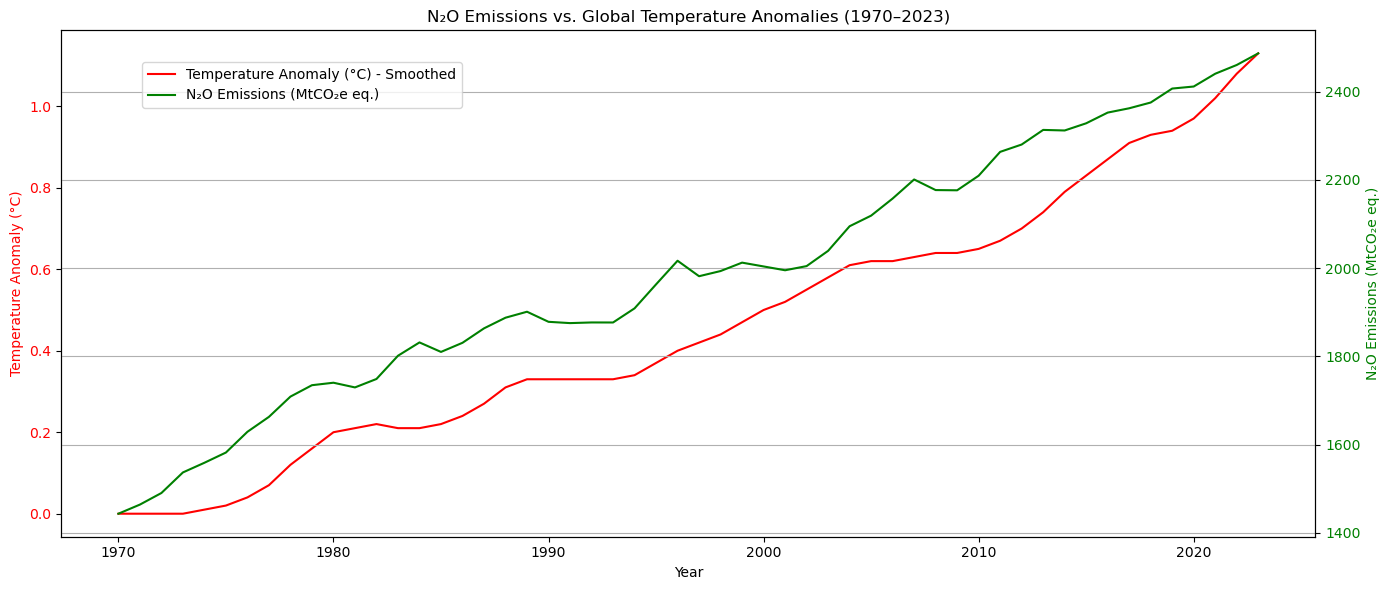


Statistical Summary (N₂O):


{'Pearson Correlation': 0.9847,
 'P-Value (Correlation)': 0.0,
 'Linear Regression Slope': 0.001087,
 'Intercept': -1.7025,
 'R-squared': 0.9696,
 'Std Error': 2.7e-05,
 'Std Dev - N₂O Emissions': 285.13,
 'Std Dev - Temperature': 0.3148}

In [466]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 6))

# Temperature
ax1.plot(merged_df["Year"], merged_df["Smoothed_Anomaly"], color="red", label="Temperature Anomaly (°C) - Smoothed")
ax1.set_ylabel("Temperature Anomaly (°C)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.set_xlabel("Year")

# N₂O Emissions
ax2 = ax1.twinx()
ax2.plot(merged_df["Year"], merged_df["N2O_Emissions"], color="green", label="N₂O Emissions (MtCO₂e eq.)")
ax2.set_ylabel("N₂O Emissions (MtCO₂e eq.)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

plt.title("N₂O Emissions vs. Global Temperature Anomalies (1970–2023)")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.tight_layout()
plt.show()

# Merge datasets
merged_df = pd.merge(n2o_global, temp_data, on="Year")

# Statistical Analysis
from scipy.stats import linregress, pearsonr

slope, intercept, r_value, p_value, std_err = linregress(merged_df["N2O_Emissions"], merged_df["Smoothed_Anomaly"])
corr_coef, _ = pearsonr(merged_df["N2O_Emissions"], merged_df["Smoothed_Anomaly"])

# Summary
print("\nStatistical Summary (N₂O):")
{
    "Pearson Correlation": round(corr_coef, 4),
    "P-Value (Correlation)": round(p_value, 4),
    "Linear Regression Slope": round(slope, 6),
    "Intercept": round(intercept, 4),
    "R-squared": round(r_value ** 2, 4),
    "Std Error": round(std_err, 6),
    "Std Dev - N₂O Emissions": round(merged_df["N2O_Emissions"].std(), 2),
    "Std Dev - Temperature": round(merged_df["Smoothed_Anomaly"].std(), 4),
}


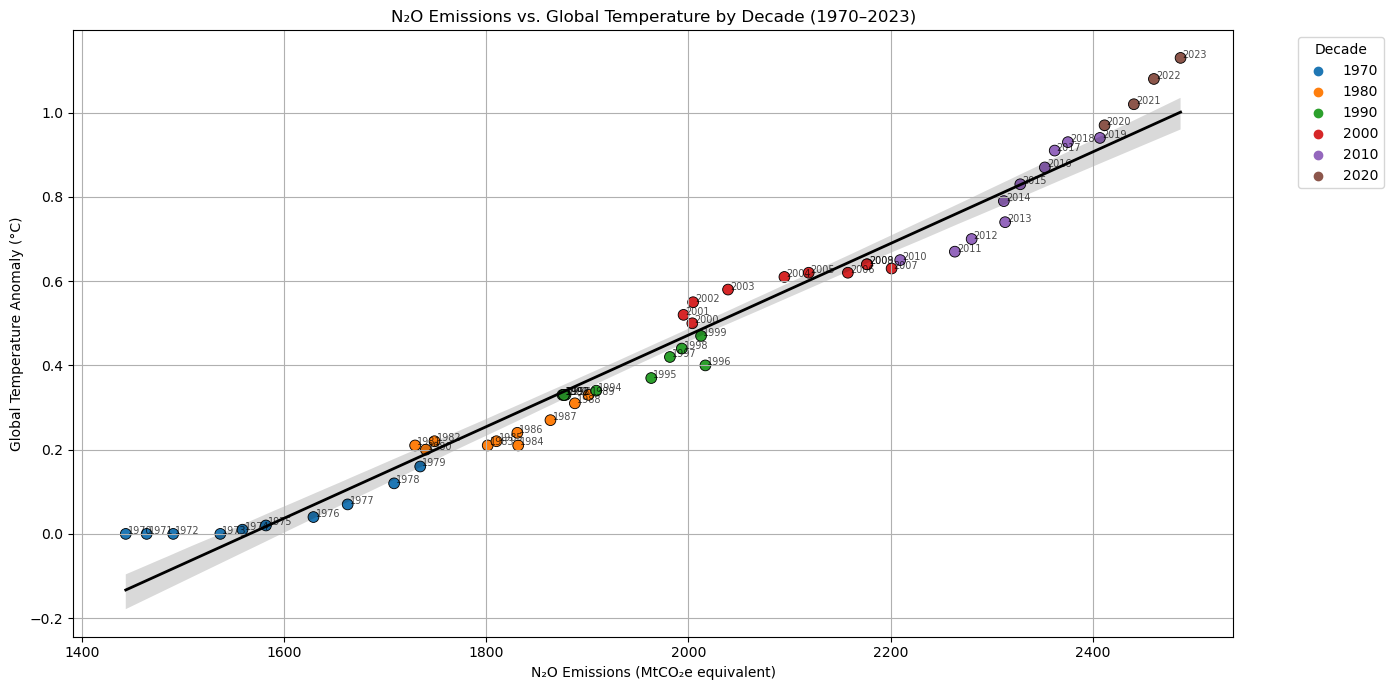


Statistical Summary (N₂O):


{'Pearson Correlation': 0.9847,
 'P-Value (Correlation)': 0.0,
 'Linear Regression Slope': 0.001087,
 'Intercept': -1.7025,
 'R-squared': 0.9696,
 'Std Error': 2.7e-05,
 'Std Dev - N₂O Emissions': 285.13,
 'Std Dev - Temperature': 0.3148}

In [467]:
import seaborn as sns
from scipy.stats import linregress, pearsonr

# Create Decade column
merged_df["Decade"] = (merged_df["Year"] // 10) * 10

plt.figure(figsize=(14, 7))
sns.scatterplot(
    x="N2O_Emissions",
    y="Smoothed_Anomaly",
    hue="Decade",
    palette="tab10",
    data=merged_df,
    s=60,
    edgecolor="black"
)

# Regression line
sns.regplot(
    x="N2O_Emissions",
    y="Smoothed_Anomaly",
    data=merged_df,
    scatter=False,
    color="black",
    line_kws={"linewidth": 2}
)

# Year labels
for _, row in merged_df.iterrows():
    plt.text(
        row["N2O_Emissions"] + 2,
        row["Smoothed_Anomaly"],
        f"{int(row['Year'])}",
        fontsize=7,
        alpha=0.7
    )

# Labels and title
plt.xlabel("N₂O Emissions (MtCO₂e equivalent)")
plt.ylabel("Global Temperature Anomaly (°C)")
plt.title("N₂O Emissions vs. Global Temperature by Decade (1970–2023)")
plt.legend(title="Decade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Merge datasets
merged_df = pd.merge(n2o_global, temp_data, on="Year")

slope, intercept, r_value, p_value, std_err = linregress(merged_df["N2O_Emissions"], merged_df["Smoothed_Anomaly"])
corr_coef, _ = pearsonr(merged_df["N2O_Emissions"], merged_df["Smoothed_Anomaly"])

# Summary
print("\nStatistical Summary (N₂O):")
{
    "Pearson Correlation": round(corr_coef, 4),
    "P-Value (Correlation)": round(p_value, 4),
    "Linear Regression Slope": round(slope, 6),
    "Intercept": round(intercept, 4),
    "R-squared": round(r_value ** 2, 4),
    "Std Error": round(std_err, 6),
    "Std Dev - N₂O Emissions": round(merged_df["N2O_Emissions"].std(), 2),
    "Std Dev - Temperature": round(merged_df["Smoothed_Anomaly"].std(), 4),
}


# EXPLANATION

### LINE PLOT:
1. Red line: Smoothed global temperature anomaly from 1970 to 2023.
2. Green line: Total N2O emissions (in MtCO2e equivalent) from all countries excluding aggregrates like EU27 and Global Total.
3. Both curves rise steadily over time with N2O emissions and temperature anomalies moving almost in sync especially after 1990.

### SCATTERPLOT:
1. Each point presents a year, plotted by:
- X-axis: N2O emissions
- Y-axis: Global temperature anomaly
2. Colored by decade to reveal time progression,.
3. A clear positive linear trend is visible supported by the reggression line.
4. Decades shift from left (lower emissions, cooler) to right (higher emissions, warmer).

### STATISTICAL METRICS

| Metric | Meaning |
|--------|---------|
| **Pearson Correlation (0.9847)** | Very strong positive correlation between N₂O emissions and temperature. As N₂O rises, temperature rises too. |
| **P-Value (0.0)** | Statistically significant. We can confidently say there’s a real relationship, not random noise. |
| **Slope (0.001087)** | For every 1 MtCO₂e increase in N₂O emissions, global temp anomaly increases by ~0.0011°C. |
| **Intercept (-1.7025)** | Predicted anomaly when N₂O is zero. Not realistic, but needed for regression line. |
| **R-squared (0.9696)** | 97% of the variation in global temperatures can be explained by N₂O emissions — **very high explanatory power**. |
| **Standard Errors** | Small, meaning slope estimate is **precise**. |
| **Standard Deviation of N₂O (285.13)** | N₂O emissions have a moderate spread over the years. |
| **Standard Deviation of Temp (0.3148)** | Temp anomaly varies about ±0.3°C from its mean. |

### INSIGHTS
1. N2O, though a smaller contributor by volume compared to CO2 and CH4, has a very strong statistical relationship with temp anomalies.
2. The trendlines and color-coded decades make it cear that emissions increased consistently, temperature followed a similar pattern, and each decade tends to move higher in both emissions and temp.


The analysis supports the scientific consensus that N2= is a potent greenhouse gas contributing significantly to global warming. 

While N₂O (nitrous oxide) is emitted in much smaller volumes compared to CO₂ and CH₄, this analysis shows that its impact on global temperatures is far from small.

**Strong Link Between N₂O and Temperature**

- With a Pearson correlation of 0.9847 and an R² of 96.96%, the data shows that N₂O emissions are extremely tightly coupled with rising temperature anomalies.

- In fact, among the three gases analyzed (CO₂, CH₄, and N₂O), N₂O shows the strongest statistical fit with temperature — highlighting its outsized role in climate dynamics.

**Steady and Consistent Growth**

- The N₂O emissions have increased steadily year after year, with no major dips or volatility.

- This is clearly visible in both the line plot and the scatterplot, where each decade gradually shifts to the right (higher emissions) and upward (higher temperature).

**Often Overlooked, Yet Critical**

- N₂O is often overshadowed by CO₂ in climate discussions, yet it is 298 times more potent than CO₂ over a 100-year period.

- Most N₂O comes from agriculture (especially fertilizers) — an area that's harder to decarbonize and not as tightly regulated globally.


HENCE,

    “Even low-volume greenhouse gases like N₂O can have a massive influence on climate change - not because of how much we emit, but because of how powerfully they trap heat.”

This stresses the need to diversify mitigation efforts such as addressing not just CO₂, but also other potent gases like N₂O and CH₄ through better land management, agricultural reform, and sustainable nitrogen use.


# ADDITIONAL INFO

In [460]:
# Multiply N₂O emissions by the GWP factor (298 from IPCC AR5)
n2o_global["N2O_CO2eq"] = n2o_global["N2O_Emissions"] * 298

# Optional: Preview the updated DataFrame
print(n2o_global[["Year", "N2O_Emissions", "N2O_CO2eq"]].head())

   Year  N2O_Emissions      N2O_CO2eq
0  1970    1443.507881  430165.348542
1  1971    1464.158571  436319.254204
2  1972    1490.427651  444147.439912
3  1973    1537.046724  458039.923885
4  1974    1558.969314  464572.855572


The **EDGAR** dataset applies GWP-100 values based on the IPCC AR5, converting methane and nitrous oxide emissions into MtCO₂e, allowing us to compare them fairly with CO₂.

While this analysis tracks raw N₂O emissions and their correlation with temperature, it's important to note that N₂O is 298 times more potent than CO₂ over a 100-year period. This gives it an outsized effect on warming, despite much lower volumes.


The Global Warming Potential (GWP) factor states that:
- 1 ton of N₂O = 298 tons of CO₂ equivalent over 100 years (as per IPCC AR5).

This shows its relative potency in trapping heat, not just the raw amount emitted.




### 1. Intergovernmental Panel on Climate Change (IPCC) Reports

The **IPCC** provides the official GWP values used globally. The most commonly used GWP values come from:
- **AR4 (Fourth Assessment Report, 2007)** – still used in many emissions inventories
- **AR5 (Fifth Assessment Report, 2014)** – more updated
- **AR6 (Sixth Assessment Report, 2021–2023)** – most recent but not yet standard in all reporting

#### Example (from IPCC AR5 – 100-year GWP):
| Gas  | GWP-100 | Source                     |
|------|---------|----------------------------|
| CO₂  | 1       | Reference gas              |
| CH₄  | 28–34   | Depends on source (fossil or biogenic) |
| N₂O  | 265–298 | Variance due to feedbacks  |

**Official source**: [IPCC AR5 Working Group I Report](https://www.ipcc.ch/report/ar5/wg1/)

---

### **2. EPA (Environmental Protection Agency) Website**
- The **U.S. EPA** explains and uses these GWP values in its climate reporting.
- Good for practical explanations, tables, and policy-related use.

Example link:  
[https://www.epa.gov/ghgemissions/understanding-global-warming-potentials](https://www.epa.gov/ghgemissions/understanding-global-warming-potentials)

---

### **3. EDGAR Database (Our Dataset Source)**
In the EDGAR dataset we're using (from the GHG booklet), gases like methane and nitrous oxide are already converted into **CO₂ equivalents** using their GWP:
- For example, column names like `GWP_100_AR5_CH4` or `GWP_100_AR5_N2O` indicate **these are multiplied by GWP factors already.**

So, we're **already working with emissions that reflect their warming impact**, based on AR5!

---

> Hence, in this analysis:
> _"The EDGAR dataset applies GWP-100 values based on the IPCC AR5, converting methane and nitrous oxide emissions into MtCO₂e, allowing us to compare them fairly with CO₂."_


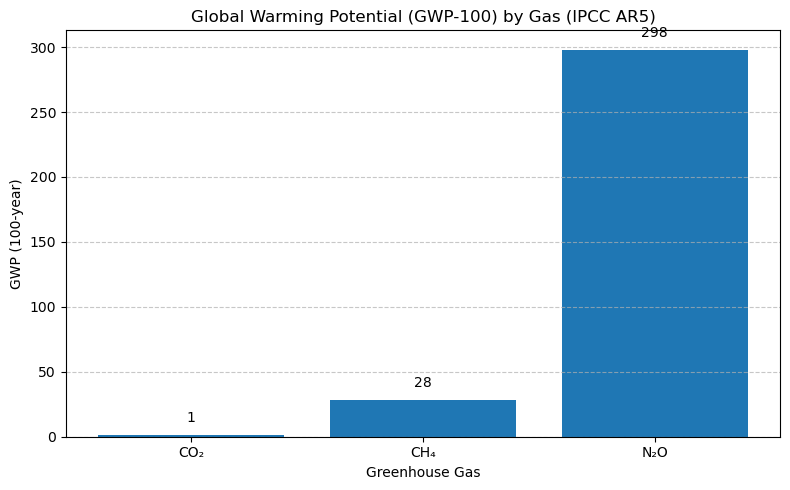

In [468]:
import matplotlib.pyplot as plt #use for creating static plots like bar, line graphs, scatter plots

# GWP values based on IPCC AR5 for 100-year time horizon
"""    gases: the names of the greenhouse gases.

       gwp_values: their GWP-100 values (i.e., impact over 100 years), where:

        CO₂ is the baseline (GWP = 1),

        CH₄ is 28 times more powerful than CO₂,

        N₂O is 298 times more powerful than CO₂.

These values come from the Intergovernmental Panel on Climate Change (IPCC) 5th Assessment Report (AR5)."""

gases = ['CO₂', 'CH₄', 'N₂O']
gwp_values = [1, 28, 298]

# Plotting
"""Initializes a figure of size 8x5 inches.
Plots a bar chart with gases on the x-axis and GWP values on the y-axis.
bars stores the bar objects so we can use them for annotations."""

plt.figure(figsize=(8, 5))
bars = plt.bar(gases, gwp_values)

"""Adds a title and axis labels.
Enables a horizontal grid (axis='y') with dashed lines for readability."""

plt.title("Global Warming Potential (GWP-100) by Gas (IPCC AR5)")
plt.ylabel("GWP (100-year)")
plt.xlabel("Greenhouse Gas")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values on top of bars
"""Loops over each bar to display the exact GWP value on top.
bar.get_height() gives the height of the bar.
plt.text(...) places the number slightly above the top of the bar."""
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f"{height}", ha='center', fontsize=10)

    
"""tight_layout() adjusts spacing so nothing overlaps.
show() renders the final chart."""
plt.tight_layout()
plt.show()


1. CO₂ (Carbon Dioxide): GWP = 1 (baseline)

2. CH₄ (Methane): GWP = 28 → 28 times more potent than CO₂

3. N₂O (Nitrous Oxide): GWP = 298 → 298 times more potent than CO₂

Insight: While CO₂ is emitted in much larger quantities, CH₄ and N₂O are far more effective at trapping heat per molecule, with N₂O being the most powerful of the three. This makes reducing emissions of all three gases critical to addressing climate change effectivel

# D. COMBINE THE THREE GHGs WITH GLOBAL TEMP

In [476]:
# Filter for CO₂
co2_data = ghg_sectors_clean[ghg_sectors_clean["Substance"] == "CO2"]

# Get only year columns
year_columns = [col for col in co2_data.columns if isinstance(col, int)]

# Melt into long format
ghg_long = co2_data.melt(
    id_vars=["Country", "Substance"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Emissions"
)

# Clean
ghg_long = ghg_long.dropna()
ghg_long["Year"] = ghg_long["Year"].astype(int)

# Group by Year and sum emissions
co2_global = ghg_long.groupby("Year")["Emissions"].sum().reset_index()
co2_global.columns = ["Year", "CO2_Emissions"]

# Confirm it's fixed
print(co2_global.head())
print("CO2 years:", co2_global["Year"].min(), "to", co2_global["Year"].max())


   Year  CO2_Emissions
0  1970   15751.858044
1  1971   15683.389817
2  1972   16481.436077
3  1973   17464.383654
4  1974   17400.275859
CO2 years: 1970 to 2023


In [477]:
# Filter for CH₄
ch4_data = ghg_sectors_clean[ghg_sectors_clean["Substance"] == "GWP_100_AR5_CH4"]

# Get only year columns
year_columns = [col for col in ch4_data.columns if isinstance(col, int)]

# Melt into long format
ghg_long_ch4 = ch4_data.melt(
    id_vars=["Country", "Substance"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Emissions"
)

# Clean
ghg_long_ch4 = ghg_long_ch4.dropna()
ghg_long_ch4["Year"] = ghg_long_ch4["Year"].astype(int)

# Group by Year and sum emissions
ch4_global = ghg_long_ch4.groupby("Year")["Emissions"].sum().reset_index()
ch4_global.columns = ["Year", "CH4_Emissions"]

# Confirm
print(ch4_global.head())
print("CH₄ years:", ch4_global["Year"].min(), "to", ch4_global["Year"].max())


   Year  CH4_Emissions
0  1970    6654.050363
1  1971    6738.493417
2  1972    6829.570998
3  1973    7002.622209
4  1974    7030.658160
CH₄ years: 1970 to 2023


In [478]:
# Filter for N₂O
n2o_data = ghg_sectors_clean[ghg_sectors_clean["Substance"] == "GWP_100_AR5_N2O"]

# Get only year columns
year_columns = [col for col in n2o_data.columns if isinstance(col, int)]

# Melt into long format
ghg_long_n2o = n2o_data.melt(
    id_vars=["Country", "Substance"],
    value_vars=year_columns,
    var_name="Year",
    value_name="Emissions"
)

# Clean
ghg_long_n2o = ghg_long_n2o.dropna()
ghg_long_n2o["Year"] = ghg_long_n2o["Year"].astype(int)

# Group by Year and sum emissions
n2o_global = ghg_long_n2o.groupby("Year")["Emissions"].sum().reset_index()
n2o_global.columns = ["Year", "N2O_Emissions"]

# Confirm
print(n2o_global.head())
print("N₂O years:", n2o_global["Year"].min(), "to", n2o_global["Year"].max())


   Year  N2O_Emissions
0  1970    1443.507881
1  1971    1464.158571
2  1972    1490.427651
3  1973    1537.046724
4  1974    1558.969314
N₂O years: 1970 to 2023


In [479]:
# Check all year ranges
print("CO2 years:", co2_global["Year"].min(), "to", co2_global["Year"].max())
print("CH4 years:", ch4_global["Year"].min(), "to", ch4_global["Year"].max())
print("N2O years:", n2o_global["Year"].min(), "to", n2o_global["Year"].max())
print("Temperature years:", temp_data["Year"].min(), "to", temp_data["Year"].max())

# Check Year dtypes
print(co2_global["Year"].dtype)
print(temp_data["Year"].dtype)


CO2 years: 1970 to 2023
CH4 years: 1970 to 2023
N2O years: 1970 to 2023
Temperature years: 1970 to 2024
int32
int32


In [488]:
# Merge all three gases
combined_df = pd.merge(co2_global, ch4_global, on="Year")
combined_df = pd.merge(combined_df, n2o_global, on="Year")

# Add total CO₂-equivalent (CH₄ * 28 + N₂O * 298)
combined_df["CO2_eq"] = (       #standardized unit that expresses the impact of different GHG in terms of the amount of CO2 that would cause the same amount of global warming.
    combined_df["CO2_Emissions"] +   #CO2_eq represents the total warming impact in a single number which is important for 
    combined_df["CH4_Emissions"] * 28 +     #climate modeling, policy making, international reporting(IPCC, UNFCC)
    combined_df["N2O_Emissions"] * 298
)

# Merge with temperature
final_df = pd.merge(combined_df, temp_data, on="Year")

# Final check
print("\n Combined GHG + Temperature Data:")
print(final_df.head())



 Combined GHG + Temperature Data:
   Year  CO2_Emissions  CH4_Emissions  N2O_Emissions         CO2_eq  \
0  1970   15751.858044    6654.050363    1443.507881  632230.616744   
1  1971   15683.389817    6738.493417    1464.158571  640680.459707   
2  1972   16481.436077    6829.570998    1490.427651  651856.863938   
3  1973   17464.383654    7002.622209    1537.046724  671577.729403   
4  1974   17400.275859    7030.658160    1558.969314  678831.559919   

   Smoothed_Anomaly  
0             -0.00  
1              0.00  
2              0.00  
3             -0.00  
4              0.01  


In [490]:
# Sample in 1970
CO2_Emissions = 15751.858044
CH4_Emissions = 6654.050363
N2O_Emissions = 1443.507881

CO2_eq = CO2_Emissions + (CH4_Emissions * 28) + (N2O_Emissions * 298)
print(CO2_eq)


632230.616746


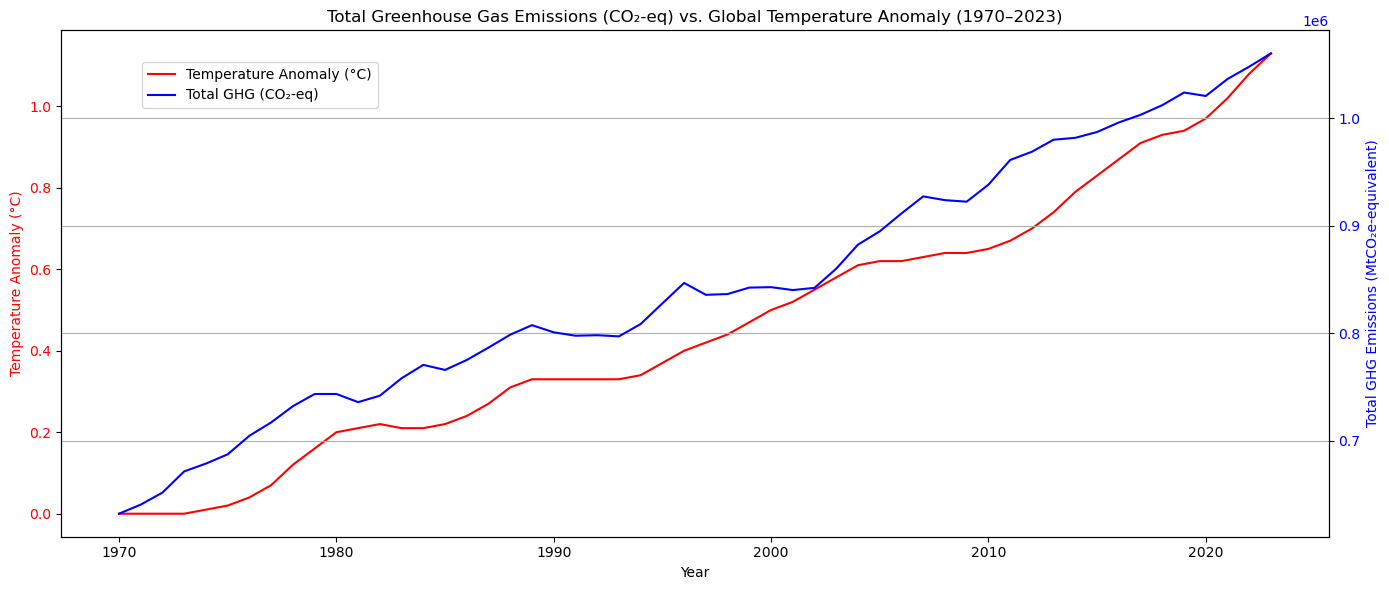

Statistical Summary (Total CO₂-eq):


{'Pearson Correlation': 0.9877,
 'P-Value (Correlation)': 0.0,
 'Linear Regression Slope': 3e-06,
 'Intercept': -1.7871,
 'R-squared': 0.9756,
 'Std Error': 0.0,
 'Std Dev - CO₂-eq Emissions': 116937.22,
 'Std Dev - Temperature': 0.3148}

In [484]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, pearsonr

# --- CORRELATION & REGRESSION ---
corr_coef, p_value = pearsonr(final_df["CO2_eq"], final_df["Smoothed_Anomaly"])
slope, intercept, r_value, _, std_err = linregress(final_df["CO2_eq"], final_df["Smoothed_Anomaly"])

# --- PLOT: Dual Axis ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Temperature Anomaly - Left Axis
ax1.plot(final_df["Year"], final_df["Smoothed_Anomaly"], color="red", label="Temperature Anomaly (°C)")
ax1.set_ylabel("Temperature Anomaly (°C)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.set_xlabel("Year")

# CO₂-eq Emissions - Right Axis
ax2 = ax1.twinx()
ax2.plot(final_df["Year"], final_df["CO2_eq"], color="blue", label="Total GHG (CO₂-eq)")
ax2.set_ylabel("Total GHG Emissions (MtCO₂e-equivalent)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("Total Greenhouse Gas Emissions (CO₂-eq) vs. Global Temperature Anomaly (1970–2023)")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.tight_layout()
plt.show()

# --- STATISTICAL SUMMARY ---
print("Statistical Summary (Total CO₂-eq):")
{
    "Pearson Correlation": round(corr_coef, 4),
    "P-Value (Correlation)": round(p_value, 4),
    "Linear Regression Slope": round(slope, 6),
    "Intercept": round(intercept, 4),
    "R-squared": round(r_value ** 2, 4),
    "Std Error": round(std_err, 6),
    "Std Dev - CO₂-eq Emissions": round(final_df["CO2_eq"].std(), 2),
    "Std Dev - Temperature": round(final_df["Smoothed_Anomaly"].std(), 4),
}


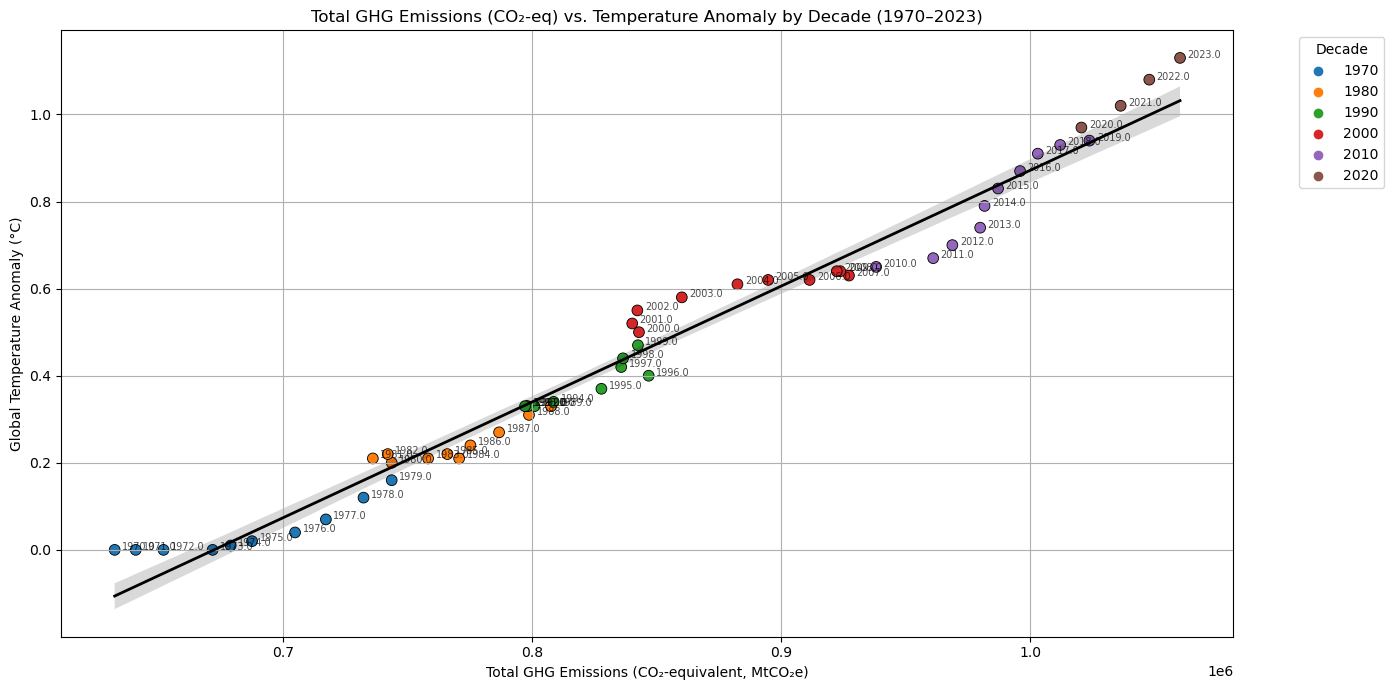

In [486]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add Decade column
final_df["Decade"] = (final_df["Year"] // 10) * 10
final_df["Year"] = final_df["Year"].astype(int)  # ensure year is int (for labels)

# Create scatterplot
plt.figure(figsize=(14, 7))
sns.scatterplot(
    x="CO2_eq",
    y="Smoothed_Anomaly",
    hue="Decade",
    palette="tab10",
    data=final_df,
    s=60,
    edgecolor="black"
)

# Add regression line
sns.regplot(
    x="CO2_eq",
    y="Smoothed_Anomaly",
    data=final_df,
    scatter=False,
    color="black",
    line_kws={"linewidth": 2}
)

# Annotate each point with the year
for _, row in final_df.iterrows():
    plt.text(
        row["CO2_eq"] + 3000,  # adjust offset as needed
        row["Smoothed_Anomaly"],
        str(row["Year"]),
        fontsize=7,
        alpha=0.7
    )

# Titles and labels
plt.title("Total GHG Emissions (CO₂-eq) vs. Temperature Anomaly by Decade (1970–2023)")
plt.xlabel("Total GHG Emissions (CO₂-equivalent, MtCO₂e)")
plt.ylabel("Global Temperature Anomaly (°C)")
plt.legend(title="Decade", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


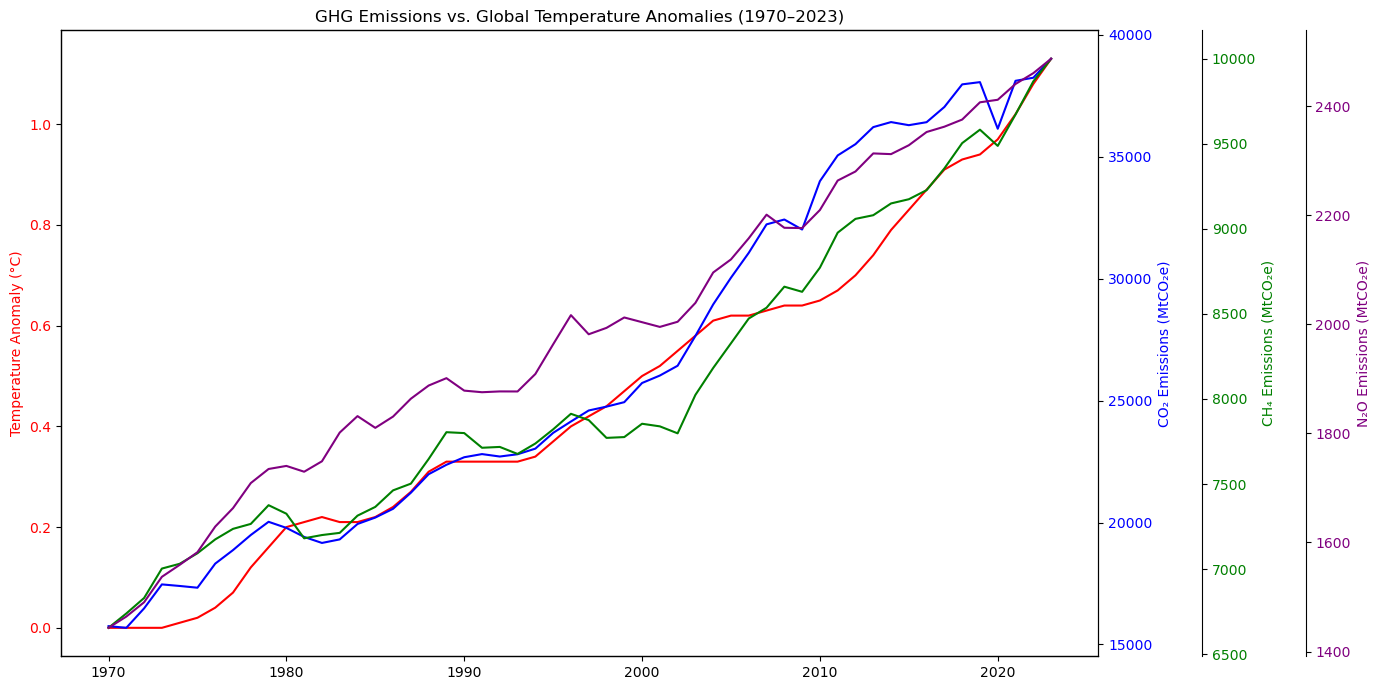


 GHG Emissions vs. Global Temperature Anomalies (1970–2023)

Statistical Summary (Individual Gases vs. Temp Anomaly):
Gas   Pearson Corr.   R² Value   Regression Slope   Intercept    Std Error    Std Dev (Emissions)
CO₂   0.9771          0.9547     4.2e-05            -0.6366      1e-06        7,409.74 MtCO₂e
CH₄   0.978           0.9565     0.000343           -2.3062      1e-05        898.15 MtCO₂e
N₂O   0.9847          0.9696     0.001087           -1.7025      2.7e-05      285.13 MtCO₂e


In [532]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

# Assuming these DataFrames already exist:
# co2_global, ch4_global, n2o_global, temp_data

# --- Merge GHGs with temperature ---
merged_df = temp_data.copy()
merged_df = pd.merge(merged_df, co2_global, on="Year")
merged_df = pd.merge(merged_df, ch4_global, on="Year")
merged_df = pd.merge(merged_df, n2o_global, on="Year")

# --- Plotting all 3 gases + temperature ---
fig, ax1 = plt.subplots(figsize=(14, 7))

# Temperature on left Y-axis
ax1.plot(merged_df["Year"], merged_df["Smoothed_Anomaly"], color="red", label="Temp Anomaly (°C)")
ax1.set_ylabel("Temperature Anomaly (°C)", color="red")
ax1.tick_params(axis='y', labelcolor='red')

# CO₂ - Right Y-axis 1
ax2 = ax1.twinx()
ax2.plot(merged_df["Year"], merged_df["CO2_Emissions"], color="blue", label="CO₂ (MtCO₂e)")
ax2.set_ylabel("CO₂ Emissions (MtCO₂e)", color="blue")
ax2.tick_params(axis='y', labelcolor='blue')

# Add another axis for CH₄
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.plot(merged_df["Year"], merged_df["CH4_Emissions"], color="green", label="CH₄ (MtCO₂e)")
ax3.set_ylabel("CH₄ Emissions (MtCO₂e)", color="green")
ax3.tick_params(axis='y', labelcolor='green')

# Add another axis for N₂O
ax4 = ax1.twinx()
ax4.spines["right"].set_position(("axes", 1.2))
ax4.plot(merged_df["Year"], merged_df["N2O_Emissions"], color="purple", label="N₂O (MtCO₂e)")
ax4.set_ylabel("N₂O Emissions (MtCO₂e)", color="purple")
ax4.tick_params(axis='y', labelcolor='purple')

# Title and grid
plt.title("GHG Emissions vs. Global Temperature Anomalies (1970–2023)")
fig.tight_layout()
plt.show()

# --- Statistical Summary ---
def regression_stats(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return {
        "Pearson Corr.": round(r_value, 4),
        "R² Value": round(r_value**2, 4),
        "Regression Slope": round(slope, 6),
        "Intercept": round(intercept, 4),
        "Std Error": round(std_err, 6),
        "Std Dev (Emissions)": f"{round(pd.Series(x).std(), 2):,} MtCO₂e"
    }

summary = {
    "CO₂": regression_stats(merged_df["CO2_Emissions"], merged_df["Smoothed_Anomaly"]),
    "CH₄": regression_stats(merged_df["CH4_Emissions"], merged_df["Smoothed_Anomaly"]),
    "N₂O": regression_stats(merged_df["N2O_Emissions"], merged_df["Smoothed_Anomaly"])
}

# --- Display nicely ---
print("\n GHG Emissions vs. Global Temperature Anomalies (1970–2023)\n")
print("Statistical Summary (Individual Gases vs. Temp Anomaly):")
print(f"{'Gas':<5} {'Pearson Corr.':<15} {'R² Value':<10} {'Regression Slope':<18} {'Intercept':<12} {'Std Error':<12} {'Std Dev (Emissions)'}")
for gas, stats in summary.items():
    print(f"{gas:<5} {stats['Pearson Corr.']:<15} {stats['R² Value']:<10} {stats['Regression Slope']:<18} {stats['Intercept']:<12} {stats['Std Error']:<12} {stats['Std Dev (Emissions)']}")


In [523]:
# Select relevant columns
corr_data = final_df[["CO2_Emissions", "CH4_Emissions", "N2O_Emissions", "CO2_eq", "Smoothed_Anomaly"]]

# Compute Pearson correlation matrix
corr_matrix = corr_data.corr()

# Show correlation values
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                  CO2_Emissions  CH4_Emissions  N2O_Emissions    CO2_eq  \
CO2_Emissions          1.000000       0.986730       0.978466  0.986529   
CH4_Emissions          0.986730       1.000000       0.975232  0.986193   
N2O_Emissions          0.978466       0.975232       1.000000  0.998339   
CO2_eq                 0.986529       0.986193       0.998339  1.000000   
Smoothed_Anomaly       0.977073       0.977997       0.984685  0.987718   

                  Smoothed_Anomaly  
CO2_Emissions             0.977073  
CH4_Emissions             0.977997  
N2O_Emissions             0.984685  
CO2_eq                    0.987718  
Smoothed_Anomaly          1.000000  


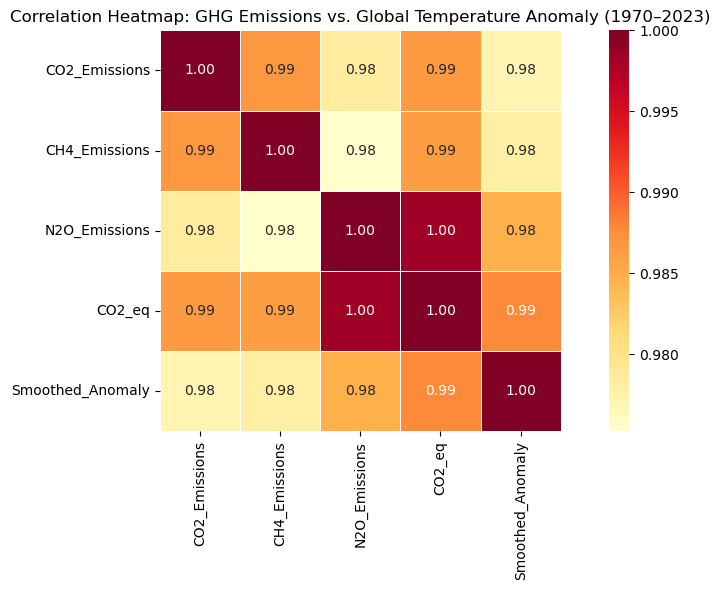

In [500]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your final merged DataFrame is called final_df
# and contains the following columns:
# ["Year", "CO2_Emissions", "CH4_Emissions", "N2O_Emissions", "CO2_eq", "Smoothed_Anomaly"]

# Select only numeric columns for correlation
corr_data = final_df[["CO2_Emissions", "CH4_Emissions", "N2O_Emissions", "CO2_eq", "Smoothed_Anomaly"]]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5, square=True)

plt.title("Correlation Heatmap: GHG Emissions vs. Global Temperature Anomaly (1970–2023)")
plt.tight_layout()
plt.show()


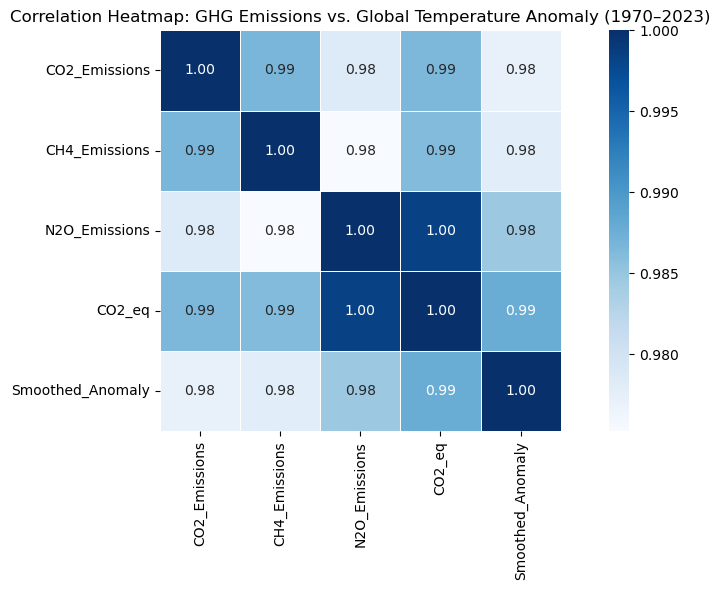

In [516]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming final_df is already created and contains:
# ["CO2_Emissions", "CH4_Emissions", "N2O_Emissions", "CO2_eq", "Smoothed_Anomaly"]

# Filter numeric columns for correlation
corr_data = final_df[["CO2_Emissions", "CH4_Emissions", "N2O_Emissions", "CO2_eq", "Smoothed_Anomaly"]]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Blues",      # BLUE color scheme
    linewidths=0.5,
    square=True
)

plt.title("Correlation Heatmap: GHG Emissions vs. Global Temperature Anomaly (1970–2023)")
plt.tight_layout()
plt.show()


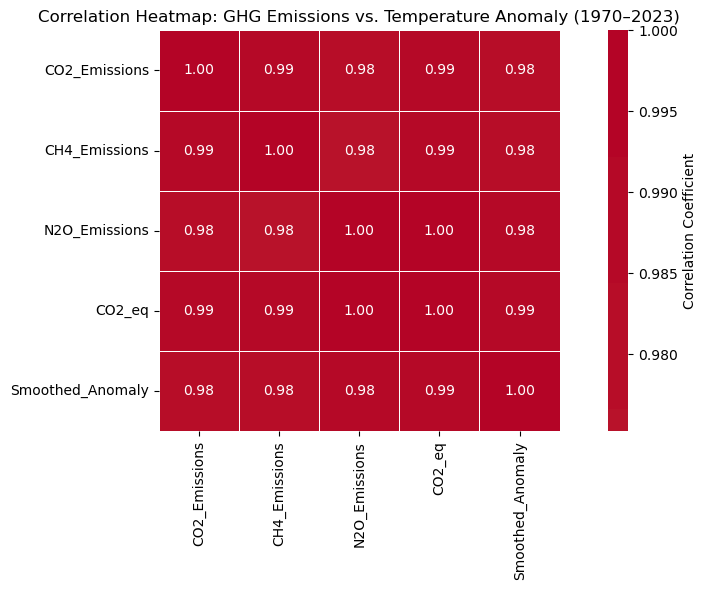

In [521]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter numeric columns for correlation
corr_data = final_df[["CO2_Emissions", "CH4_Emissions", "N2O_Emissions", "CO2_eq", "Smoothed_Anomaly"]]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",       # Blue to red for Cold to Warm
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"label": "Correlation Coefficient"}
)

plt.title("Correlation Heatmap: GHG Emissions vs. Temperature Anomaly (1970–2023)")
plt.tight_layout()
plt.show()


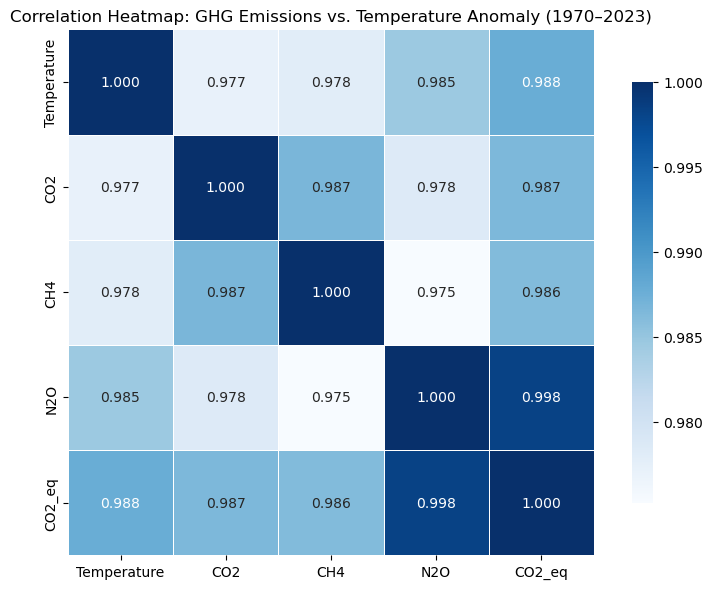

In [528]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare correlation data
corr_data = final_df[["Smoothed_Anomaly", "CO2_Emissions", "CH4_Emissions", "N2O_Emissions","CO2_eq"]]
corr_data.columns = ["Temperature", "CO2", "CH4", "N2O", "CO2_eq"]  # Rename for cleaner display
corr_matrix = corr_data.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(               #visualizes the correlations
    corr_matrix,
    annot=True,
    fmt=".3f",           # 3 decimal places
    cmap="Blues",        # Blue color palette
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap: GHG Emissions vs. Temperature Anomaly (1970–2023)", fontsize=12)
plt.tight_layout()
plt.show()


In [524]:
# Select relevant columns
corr_data = final_df[["CO2_Emissions", "CH4_Emissions", "N2O_Emissions", "CO2_eq", "Smoothed_Anomaly"]] #selects the column to analyze

# Compute Pearson correlation matrix
corr_matrix = corr_data.corr() #computes Pearson correlation coefficients

# Show correlation values
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                  CO2_Emissions  CH4_Emissions  N2O_Emissions    CO2_eq  \
CO2_Emissions          1.000000       0.986730       0.978466  0.986529   
CH4_Emissions          0.986730       1.000000       0.975232  0.986193   
N2O_Emissions          0.978466       0.975232       1.000000  0.998339   
CO2_eq                 0.986529       0.986193       0.998339  1.000000   
Smoothed_Anomaly       0.977073       0.977997       0.984685  0.987718   

                  Smoothed_Anomaly  
CO2_Emissions             0.977073  
CH4_Emissions             0.977997  
N2O_Emissions             0.984685  
CO2_eq                    0.987718  
Smoothed_Anomaly          1.000000  


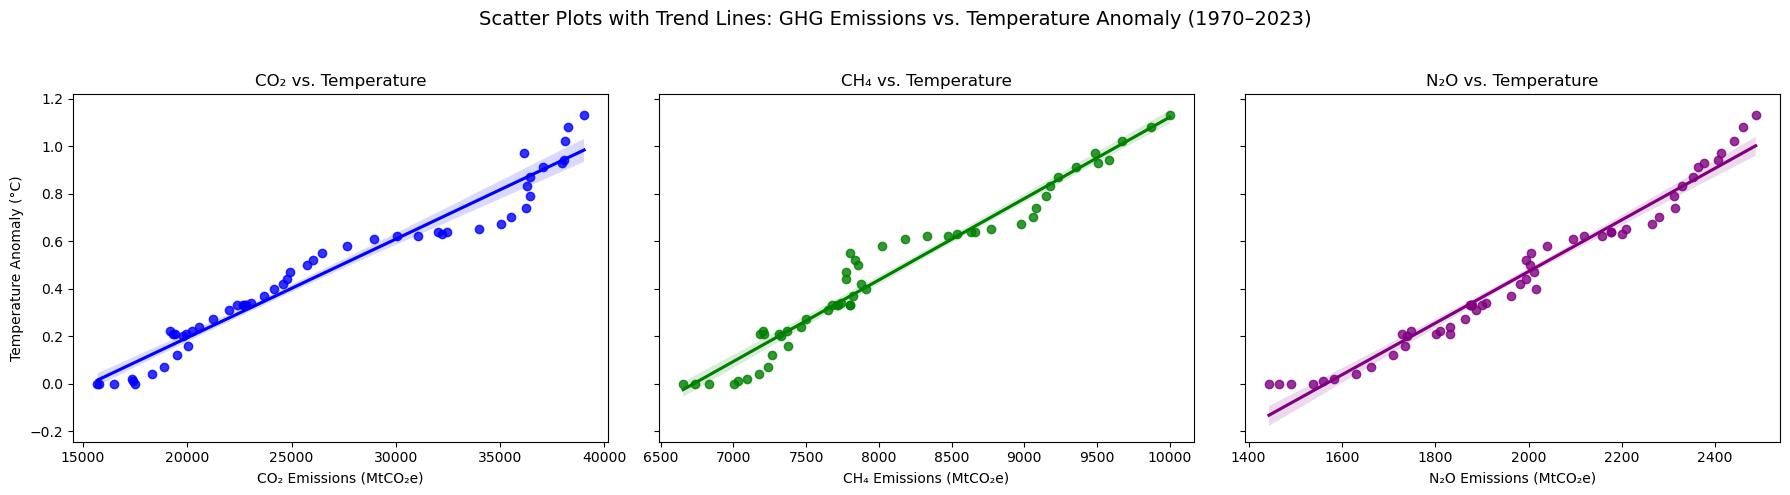

In [536]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle("Scatter Plots with Trend Lines: GHG Emissions vs. Temperature Anomaly (1970–2023)", fontsize=14)

# CO₂ Plot
sns.regplot(
    ax=axes[0],
    x="CO2_Emissions",
    y="Smoothed_Anomaly",
    data=final_df,
    scatter_kws={"color": "blue"},
    line_kws={"color": "blue"},
)
axes[0].set_title("CO₂ vs. Temperature")
axes[0].set_xlabel("CO₂ Emissions (MtCO₂e)")
axes[0].set_ylabel("Temperature Anomaly (°C)")

# CH₄ Plot
sns.regplot(
    ax=axes[1],
    x="CH4_Emissions",
    y="Smoothed_Anomaly",
    data=final_df,
    scatter_kws={"color": "green"},
    line_kws={"color": "green"},
)
axes[1].set_title("CH₄ vs. Temperature")
axes[1].set_xlabel("CH₄ Emissions (MtCO₂e)")
axes[1].set_ylabel("")

# N₂O Plot
sns.regplot(
    ax=axes[2],
    x="N2O_Emissions",
    y="Smoothed_Anomaly",
    data=final_df,
    scatter_kws={"color": "purple"},
    line_kws={"color": "purple"},
)
axes[2].set_title("N₂O vs. Temperature")
axes[2].set_xlabel("N₂O Emissions (MtCO₂e)")
axes[2].set_ylabel("")



# Clean layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


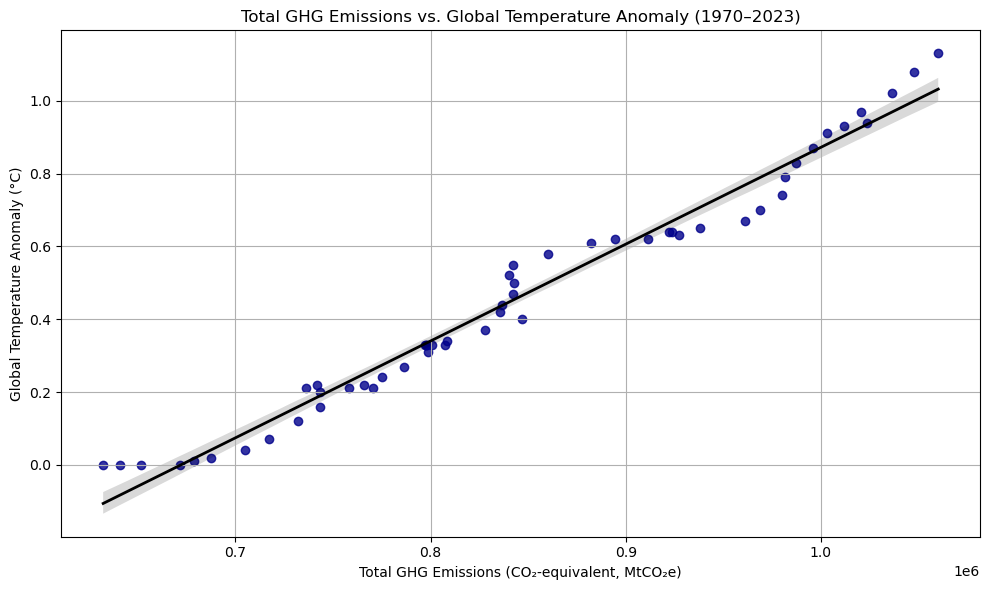

Statistical Summary (CO₂_eq vs Temp):
{'Pearson Correlation': 0.9877, 'P-Value': 0.0, 'Regression Slope': 3e-06, 'Intercept': -1.7871, 'R-squared': 0.9756, 'Std Error': 0.0, 'Std Dev - CO₂_eq': 116937.22, 'Std Dev - Temperature': 0.3148}


In [534]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Linear regression stats
slope, intercept, r_value, p_value, std_err = linregress(final_df["CO2_eq"], final_df["Smoothed_Anomaly"])

# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x="CO2_eq",
    y="Smoothed_Anomaly",
    data=final_df,
    scatter_kws={"color": "darkblue"},
    line_kws={"color": "black", "linewidth": 2},
)

# Labels & title
plt.xlabel("Total GHG Emissions (CO₂-equivalent, MtCO₂e)")
plt.ylabel("Global Temperature Anomaly (°C)")
plt.title("Total GHG Emissions vs. Global Temperature Anomaly (1970–2023)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print regression summary
print("Statistical Summary (CO₂_eq vs Temp):")
print({
    "Pearson Correlation": round(r_value, 4),
    "P-Value": round(p_value, 4),
    "Regression Slope": round(slope, 6),
    "Intercept": round(intercept, 4),
    "R-squared": round(r_value ** 2, 4),
    "Std Error": round(std_err, 6),
    "Std Dev - CO₂_eq": round(final_df["CO2_eq"].std(), 2),
    "Std Dev - Temperature": round(final_df["Smoothed_Anomaly"].std(), 4),
})


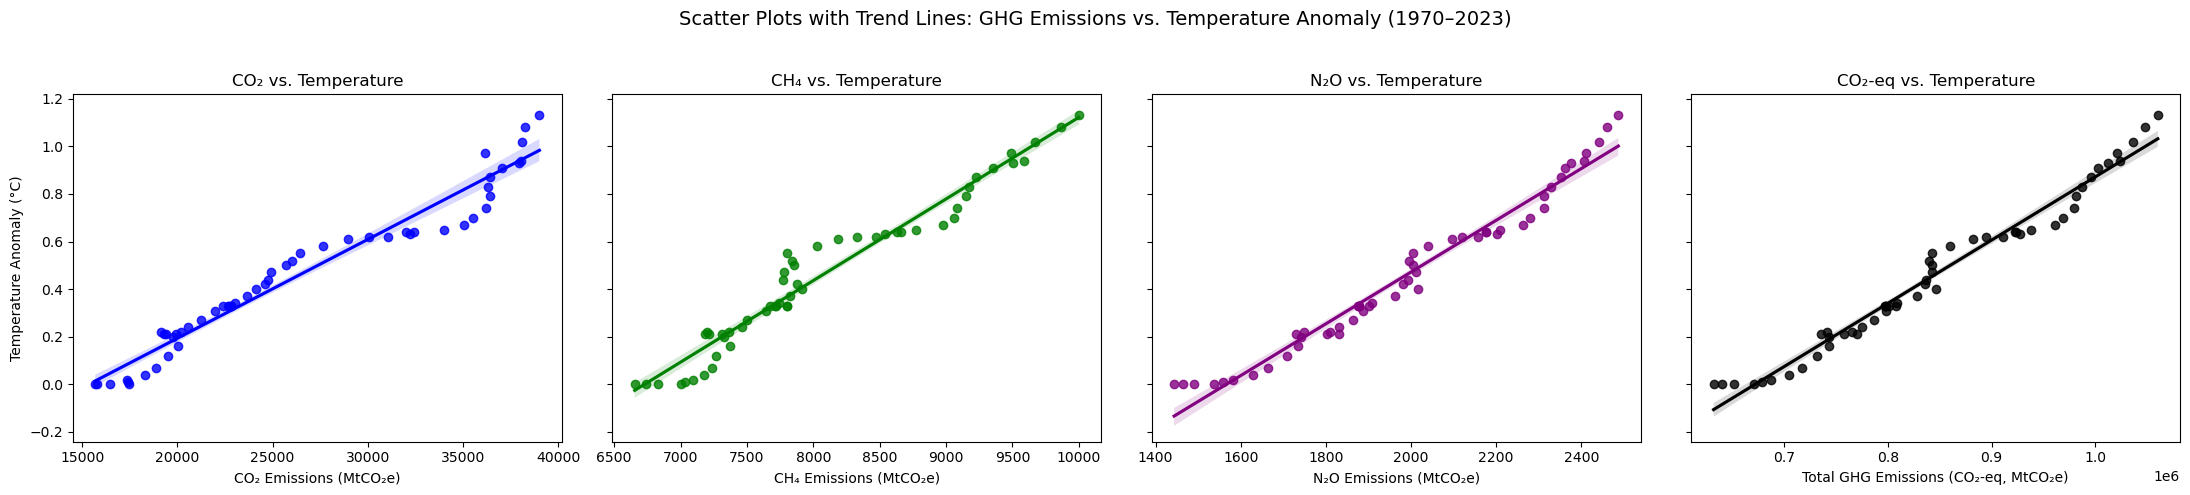

In [537]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(22, 5), sharey=True)
fig.suptitle("Scatter Plots with Trend Lines: GHG Emissions vs. Temperature Anomaly (1970–2023)", fontsize=14)

# CO₂ Plot
sns.regplot(
    ax=axes[0],
    x="CO2_Emissions",
    y="Smoothed_Anomaly",
    data=final_df,
    scatter_kws={"color": "blue"},
    line_kws={"color": "blue"},
)
axes[0].set_title("CO₂ vs. Temperature")
axes[0].set_xlabel("CO₂ Emissions (MtCO₂e)")
axes[0].set_ylabel("Temperature Anomaly (°C)")

# CH₄ Plot
sns.regplot(
    ax=axes[1],
    x="CH4_Emissions",
    y="Smoothed_Anomaly",
    data=final_df,
    scatter_kws={"color": "green"},
    line_kws={"color": "green"},
)
axes[1].set_title("CH₄ vs. Temperature")
axes[1].set_xlabel("CH₄ Emissions (MtCO₂e)")
axes[1].set_ylabel("")

# N₂O Plot
sns.regplot(
    ax=axes[2],
    x="N2O_Emissions",
    y="Smoothed_Anomaly",
    data=final_df,
    scatter_kws={"color": "purple"},
    line_kws={"color": "purple"},
)
axes[2].set_title("N₂O vs. Temperature")
axes[2].set_xlabel("N₂O Emissions (MtCO₂e)")
axes[2].set_ylabel("")

# CO₂-equivalent Plot
sns.regplot(
    ax=axes[3],
    x="CO2_eq",
    y="Smoothed_Anomaly",
    data=final_df,
    scatter_kws={"color": "black"},
    line_kws={"color": "black"},
)
axes[3].set_title("CO₂-eq vs. Temperature")
axes[3].set_xlabel("Total GHG Emissions (CO₂-eq, MtCO₂e)")
axes[3].set_ylabel("")

# Clean layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


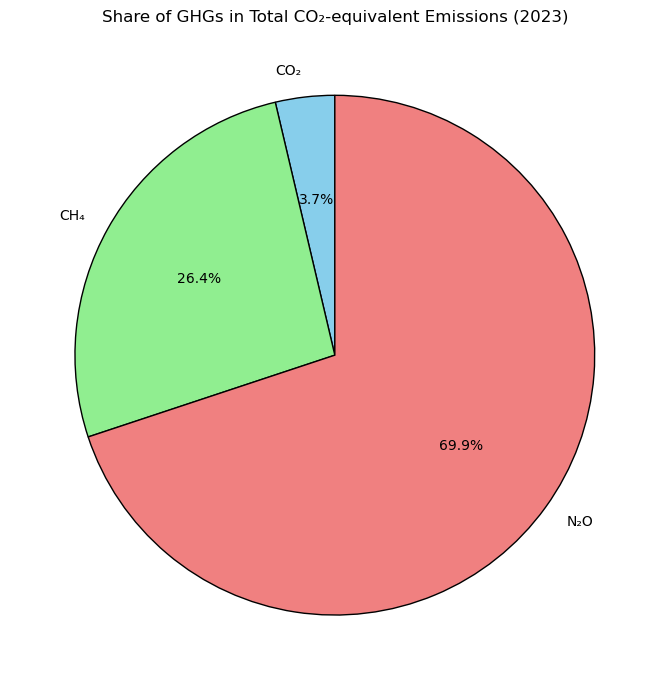

In [538]:
import matplotlib.pyplot as plt

# Select a specific year (e.g., 2023)
year = 2023
row = final_df[final_df["Year"] == year].iloc[0]

# Global Warming Potential multipliers (IPCC AR5, 100-year)
GWP_CH4 = 28
GWP_N2O = 298

# Calculate CO2-equivalent for each gas
co2_eq_values = {
    "CO₂": row["CO2_Emissions"],  # already in CO₂e
    "CH₄": row["CH4_Emissions"] * GWP_CH4,
    "N₂O": row["N2O_Emissions"] * GWP_N2O
}

# Labels and sizes
labels = co2_eq_values.keys()
sizes = co2_eq_values.values()
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title(f"Share of GHGs in Total CO₂-equivalent Emissions ({year})")
plt.tight_layout()
plt.show()


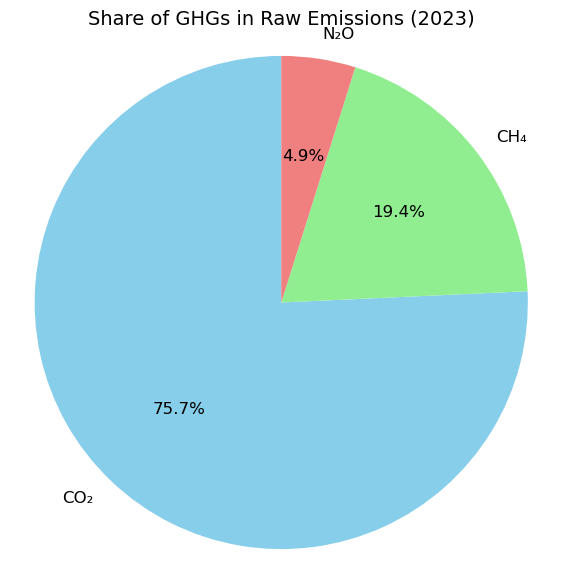

In [539]:
import matplotlib.pyplot as plt

# Raw emissions in megatonnes (2023)
raw_emissions = [39000, 10000, 2500]
labels = ["CO₂", "CH₄", "N₂O"]
colors = ["skyblue", "lightgreen", "lightcoral"]

plt.figure(figsize=(7, 7))
plt.pie(
    raw_emissions,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
    textprops={'fontsize': 12}
)

plt.title("Share of GHGs in Raw Emissions (2023)", fontsize=14)
plt.axis("equal")
plt.show()


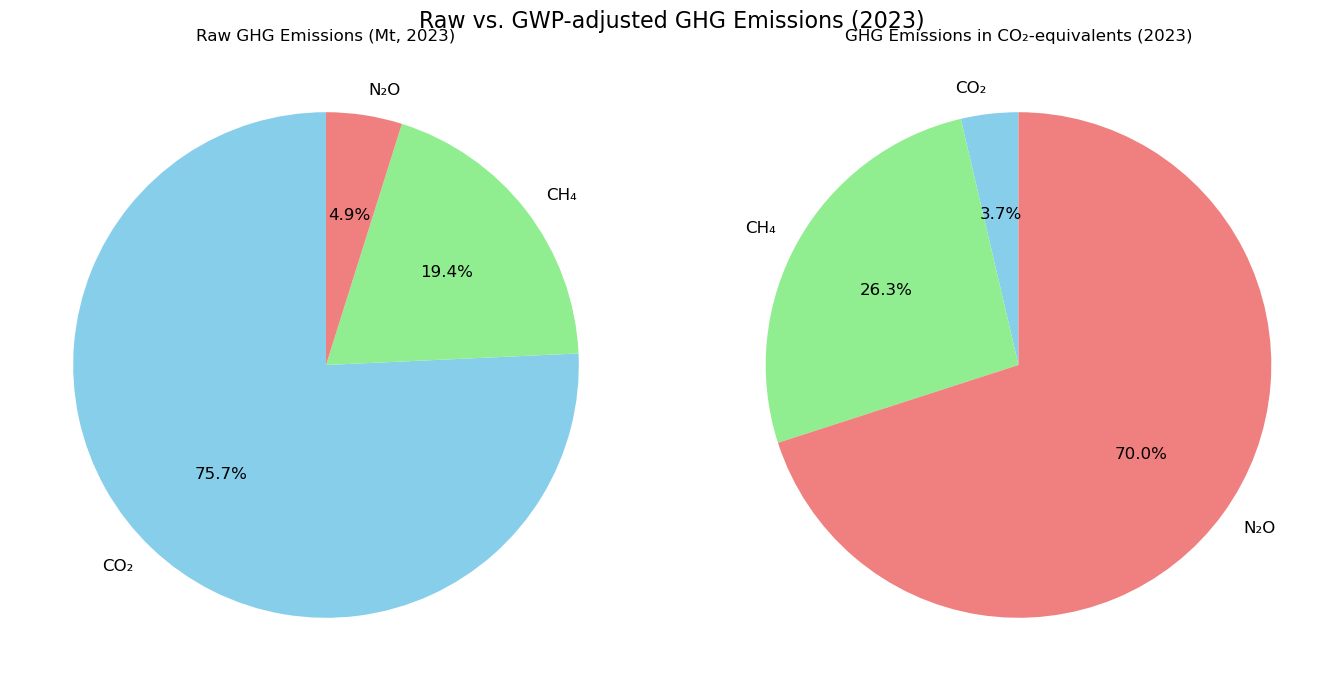

In [541]:
# Re-import required libraries after code state reset
import matplotlib.pyplot as plt

# Raw emissions in megatonnes for 2023
raw_emissions = [39000, 10000, 2500]
gwp_emissions = [
    39000 * 1,       # CO₂
    10000 * 28,      # CH₄ with GWP100 = 28
    2500 * 298       # N₂O with GWP100 = 298
]

labels = ["CO₂", "CH₄", "N₂O"]
colors = ["skyblue", "lightgreen", "lightcoral"]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Raw Emissions Pie Chart
axes[0].pie(
    raw_emissions,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
    textprops={'fontsize': 12}
)
axes[0].set_title("Raw GHG Emissions (Mt, 2023)")

# CO₂-equivalent Emissions Pie Chart
axes[1].pie(
    gwp_emissions,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
    textprops={'fontsize': 12}
)
axes[1].set_title("GHG Emissions in CO₂-equivalents (2023)")

plt.suptitle("Raw vs. GWP-adjusted GHG Emissions (2023)", fontsize=16)
plt.tight_layout()
plt.show()


In [546]:
from scipy.stats import pearsonr

# --- Calculate Pearson correlations between each gas and temperature anomaly ---
corr_co2, _ = pearsonr(final_df["CO2_Emissions"], final_df["Smoothed_Anomaly"])
corr_ch4, _ = pearsonr(final_df["CH4_Emissions"], final_df["Smoothed_Anomaly"])
corr_n2o, _ = pearsonr(final_df["N2O_Emissions"], final_df["Smoothed_Anomaly"])
corr_total, _ = pearsonr(final_df["CO2_eq"], final_df["Smoothed_Anomaly"])

# --- Organize results ---
correlations = {
    "CO₂": round(corr_co2, 4),
    "CH₄": round(corr_ch4, 4),
    "N₂O": round(corr_n2o, 4),
    "Total GHG (CO₂-eq)": round(corr_total, 4)
}

# --- Print result ---
print("Pearson Correlation Coefficients (GHG vs. Global Temp Anomaly):")
for gas, corr in correlations.items():
    print(f"{gas}: {corr}")



Pearson Correlation Coefficients (GHG vs. Global Temp Anomaly):
CO₂: 0.9771
CH₄: 0.978
N₂O: 0.9847
Total GHG (CO₂-eq): 0.9877


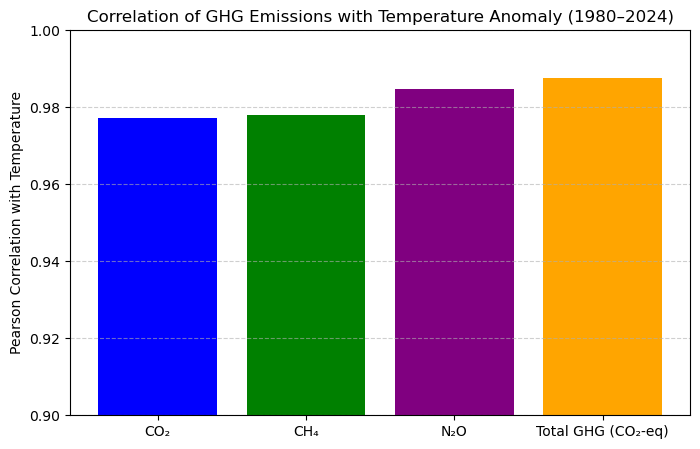

In [547]:
import matplotlib.pyplot as plt

correlations = {
    "CO₂": 0.9771,
    "CH₄": 0.9780,
    "N₂O": 0.9847,
    "Total GHG (CO₂-eq)": 0.9877
}

plt.figure(figsize=(8, 5))
plt.bar(correlations.keys(), correlations.values(), color=["blue", "green", "purple", "orange"])
plt.ylim(0.9, 1)
plt.ylabel("Pearson Correlation with Temperature")
plt.title("Correlation of GHG Emissions with Temperature Anomaly (1980–2024)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


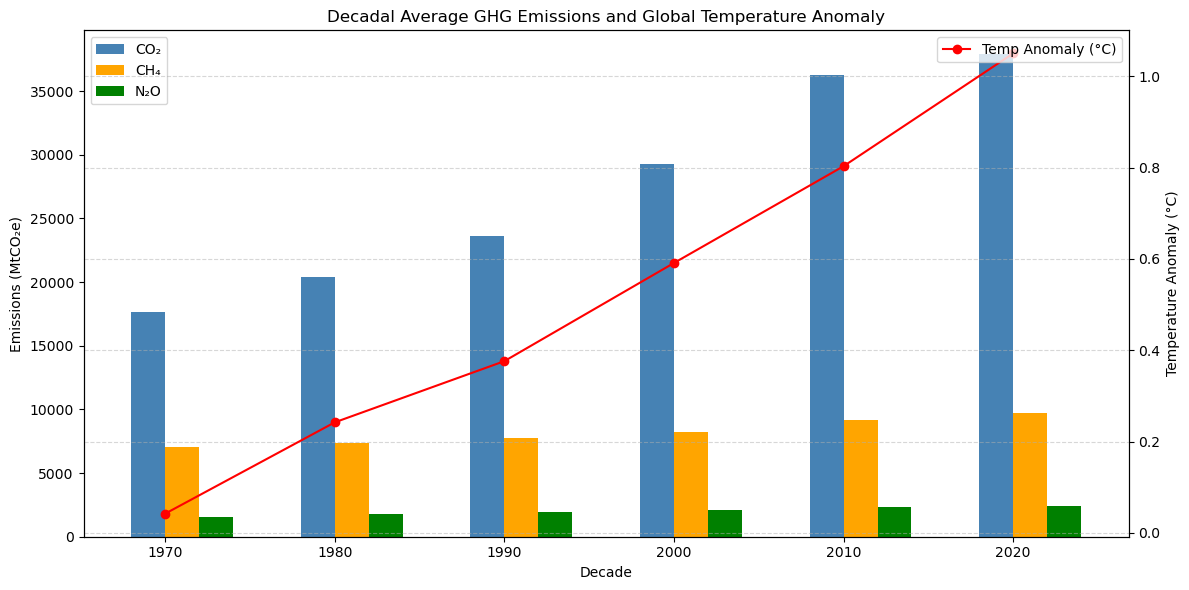

In [555]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Left axis for emissions
ax1.bar(decade_avg["Decade"] - 1, decade_avg["CO2_Emissions"], width=2, label="CO₂", color="steelblue")
ax1.bar(decade_avg["Decade"] + 1, decade_avg["CH4_Emissions"], width=2, label="CH₄", color="orange")
ax1.bar(decade_avg["Decade"] + 3, decade_avg["N2O_Emissions"], width=2, label="N₂O", color="green")
ax1.set_ylabel("Emissions (MtCO₂e)")
ax1.set_xlabel("Decade")
ax1.legend(loc="upper left")

# Right axis for temperature
ax2 = ax1.twinx()
ax2.plot(decade_avg["Decade"], decade_avg["Smoothed_Anomaly"], marker='o', color='red', label="Temp Anomaly (°C)")
ax2.set_ylabel("Temperature Anomaly (°C)")
ax2.legend(loc="upper right")

plt.title("Decadal Average GHG Emissions and Global Temperature Anomaly")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


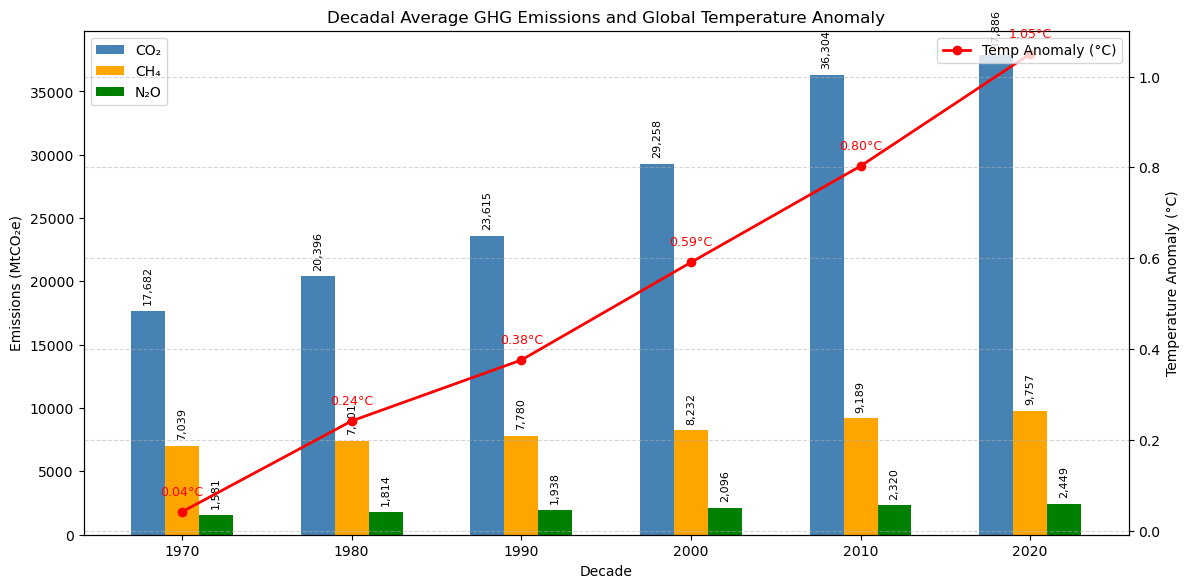

In [557]:
import matplotlib.pyplot as plt

# Assume `decade_avg` contains the decadal averages:
# Columns: ["Decade", "CO2_Emissions", "CH4_Emissions", "N2O_Emissions", "Smoothed_Anomaly"]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plots for GHG emissions
bar_width = 2
x = decade_avg["Decade"]

bar1 = ax1.bar(x - 2, decade_avg["CO2_Emissions"], width=bar_width, label="CO₂", color="steelblue")
bar2 = ax1.bar(x, decade_avg["CH4_Emissions"], width=bar_width, label="CH₄", color="orange")
bar3 = ax1.bar(x + 2, decade_avg["N2O_Emissions"], width=bar_width, label="N₂O", color="green")

# Add emission labels above each bar
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            height + 500,
            f"{int(height):,}",
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=90
        )

ax1.set_ylabel("Emissions (MtCO₂e)")
ax1.set_xlabel("Decade")
ax1.legend(loc="upper left")

# Right axis: Line plot for temperature anomaly
ax2 = ax1.twinx()
ax2.plot(x, decade_avg["Smoothed_Anomaly"], marker='o', color='red', linewidth=2, label="Temp Anomaly (°C)")

# Add temperature labels
for i, val in enumerate(decade_avg["Smoothed_Anomaly"]):
    ax2.text(x[i], val + 0.03, f"{val:.2f}°C", ha='center', va='bottom', fontsize=9, color="red")

ax2.set_ylabel("Temperature Anomaly (°C)")
ax2.legend(loc="upper right")

# Titles and styling
plt.title("Decadal Average GHG Emissions and Global Temperature Anomaly")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [560]:
# THIS IS HOW WE GET THE VALUES IN OUR BAR PLOT. WE GET THE MEAN (AVERAGE) OF EACH VARIABLE PER DECADE.
import pandas as pd

# Assuming you already have these DataFrames:
# co2_global, ch4_global, n2o_global, temp_data

# Step 1: Add 'Decade' column to each DataFrame
co2_global["Decade"] = (co2_global["Year"] // 10) * 10
ch4_global["Decade"] = (ch4_global["Year"] // 10) * 10
n2o_global["Decade"] = (n2o_global["Year"] // 10) * 10
temp_data["Decade"] = (temp_data["Year"] // 10) * 10

# Step 2: Group by Decade and calculate mean
co2_decade_avg = co2_global.groupby("Decade")["CO2_Emissions"].mean().reset_index()
ch4_decade_avg = ch4_global.groupby("Decade")["CH4_Emissions"].mean().reset_index()
n2o_decade_avg = n2o_global.groupby("Decade")["N2O_Emissions"].mean().reset_index()
temp_decade_avg = temp_data.groupby("Decade")["Smoothed_Anomaly"].mean().reset_index()

# Step 3: Merge all into one DataFrame
decadal_avg = co2_decade_avg.merge(ch4_decade_avg, on="Decade")
decadal_avg = decadal_avg.merge(n2o_decade_avg, on="Decade")
decadal_avg = decadal_avg.merge(temp_decade_avg, on="Decade")

# Optional: Round for readability
decadal_avg = decadal_avg.round(2)

# Step 4: Display the result
print(" Decadal Averages (Emissions and Temperature):")
print(decadal_avg)


 Decadal Averages (Emissions and Temperature):
   Decade  CO2_Emissions  CH4_Emissions  N2O_Emissions  Smoothed_Anomaly
0    1970       17682.17        7039.92        1581.22              0.04
1    1980       20396.35        7401.38        1814.60              0.24
2    1990       23615.46        7780.31        1938.48              0.38
3    2000       29258.95        8232.72        2096.98              0.59
4    2010       36304.64        9189.05        2320.50              0.80
5    2020       37886.47        9757.82        2449.98              1.08
